PROCESO DE PREDICCIÓN DE LOS ATAQUES DEL ASMA - MACHINE LEARNING

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#CARGA DE DATOS DEL DATASET DE KAGGLE
carpeta=r"C:/MODELO-CRISIS-ASMATICA/"
archivo='asthma_disease_data.csv'
data_set_im=pd.read_csv(carpeta+archivo,sep=',')
data_set_im.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [3]:
df_asma = data_set_im[["BMI","Wheezing","ShortnessOfBreath","ChestTightness","Coughing","Diagnosis"]]
df_asma.head(10)

,BMI,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,Diagnosis
0,15.848744,0,0,1,0,0
1,22.757042,1,0,0,1,0
2,18.395396,1,1,1,0,0
3,38.515278,1,0,1,1,0
4,19.283802,1,1,1,0,0
5,21.812975,1,0,1,0,0
6,30.245954,1,1,1,0,0
7,26.048416,1,0,0,1,0
8,32.676204,1,1,1,1,0
9,29.910298,1,0,0,0,0


In [4]:
df_asma["BMI"] = df_asma["BMI"].round(1)
df_asma.head()


C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_21996\4069661332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asma["BMI"] = df_asma["BMI"].round(1)


,BMI,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,Diagnosis
0,15.8,0,0,1,0,0
1,22.8,1,0,0,1,0
2,18.4,1,1,1,0,0
3,38.5,1,0,1,1,0
4,19.3,1,1,1,0,0


In [5]:
df_asma["Diagnosis"].value_counts()

Diagnosis
0    2268
1     124
Name: count, dtype: int64

### BALANCEO DE DATOS - USANDO TECNICAS DE SOBREMUESTREO

In [7]:
#SEPARACION DEL DATASET EN CARACTERISTICAS Y ETIQUETAS
x_risk_factors=df_asma[['BMI', 'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing']]
y_target=df_asma["Diagnosis"]

#### SOBREMUESTREO

##### RANDOM OVER SAMPLER (ROS)

In [8]:
# Random Over Sampler
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)
dataROS,targetROS=ros.fit_resample(x_risk_factors,y_target)
pacientesSanosROS=targetROS.sum()
pacientesEnfermosROS=targetROS.shape[0]-pacientesSanosROS
print(f'Pacientes Sanos: {pacientesSanosROS} y Pacientes Enfermos: {pacientesEnfermosROS}')

Pacientes Sanos: 2268 y Pacientes Enfermos: 2268


##### SMOTE

In [9]:
#IMPORTAMOS LOS PAQUETES
from imblearn.over_sampling import SMOTE
#INICIALIZANDO SMOTE
smote=SMOTE(random_state=42)
dataSMOTE,targetSMOTE=smote.fit_resample(x_risk_factors,y_target)
pacientesSanosSMOTE=targetSMOTE.sum()
pacientesEnfermosSMOTE=targetSMOTE.shape[0]-pacientesSanosSMOTE
print(f'Pacientes Sanos SMOTE: {pacientesSanosSMOTE} y Pacientes Enfermos SMOTE: {pacientesEnfermosSMOTE}')
# dataSMOTE

Pacientes Sanos SMOTE: 2268 y Pacientes Enfermos SMOTE: 2268


### ENTREMAMIENTO DE MODELO MACHINE LEARNING

#### LIBRERIAS PARA ENTRENAMIENTOS DE MODELO ML

In [10]:
#Libreria para medir el tiempo de entrenamiento de los modelos de ML
import time
#Libreria para la distribucion de los datos balanceados en datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
##LIBRERIAS PARA IMPORTAR LOS ALGORITMOS
#libreria para utilizar el Algoritmo Logistical Regresion
from sklearn.linear_model import LogisticRegression
#libreria para utilizar el Algoritmo Random Forest
from sklearn.ensemble import RandomForestClassifier
#libreria para utilizar el Algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier
#libreria para utilizar el Algoritmo Decision Tree
from sklearn.tree import DecisionTreeClassifier
#libreria para utilizar el Algoritmo XGBoost
from xgboost import XGBClassifier
#libreria para utilizar el Algoritmo AdaBoost
from sklearn.ensemble import AdaBoostClassifier
#Libreria para utilizar el Algoritmo  Naive Bayes
from sklearn.naive_bayes import GaussianNB

#### LIBRERIAS DE METRICAS DE RENDIMIENTO

In [11]:
#ACURRACY: EXACTITUD
#PRECISION: PRECISION
#RECALL: SENSIBILIDAD
#F1 SCORE: PUNTUACION F1
#AUC ROC
#CONFUSION_MATRIX: CALCULAR ESPECIFICIDAD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

#### LOGISTICAL REGRESSION

##### BALANCEO CON DATOS BALANCEADOS CON ROS

In [12]:
#1. REALIZAMOS LA DISTRIBUCION DE NUESTROS DATOS BALANCEADOS EN DATOS DE ENTRENAMIENTO, VALIDACION y PRUEBA
ros_dataTrain,ros_dataTemp,ros_targetTrain,ros_targetTemp=train_test_split(dataROS,targetROS,test_size=0.3,random_state=42)
ros_dataVal, ros_dataPrueba,ros_targetVal, ros_targetPrueba = train_test_split(ros_dataTemp, ros_targetTemp, test_size=0.50, random_state=42)
#2. ENTRENAMIENTO DEL MODELO LR
#A) INICIALIZACION DEL MODELO
start_train_time=time.time()
ros_modelLR=LogisticRegression(random_state=42,penalty='l1',C=1,solver='liblinear')
ros_modelLR.fit(ros_dataTrain,ros_targetTrain)
end_train_time=time.time()
time_training_model=(end_train_time-start_train_time)
print(f"TIEMPO DE ENTRENAMIENTO DEL MODELO: {time_training_model}")

TIEMPO DE ENTRENAMIENTO DEL MODELO: 0.01850438117980957


**METRICAS DE ENTRENAMIENTO LR:
{'Accuracy': 0.5508661417322834, 'Precision': 0.5509977827050998, 'Recall': 0.6173913043478261, 'F1 score': 0.5823081429408319, 'Specificity': np.float64(0.48242811501597443)}
**METRICAS DE VALIDACION LR:
{'Accuracy': 0.5411764705882353, 'Precision': 0.49866666666666665, 'Recall': 0.6012861736334405, 'F1 score': 0.5451895043731778, 'Specificity': np.float64(0.4905149051490515)}
**METRICAS DE PRUEBAS LR:
{'Accuracy': 0.5653450807635829, 'Precision': 0.5676392572944297, 'Recall': 0.6167146974063401, 'F1 score': 0.5911602209944752, 'Specificity': np.float64(0.5119760479041916)}


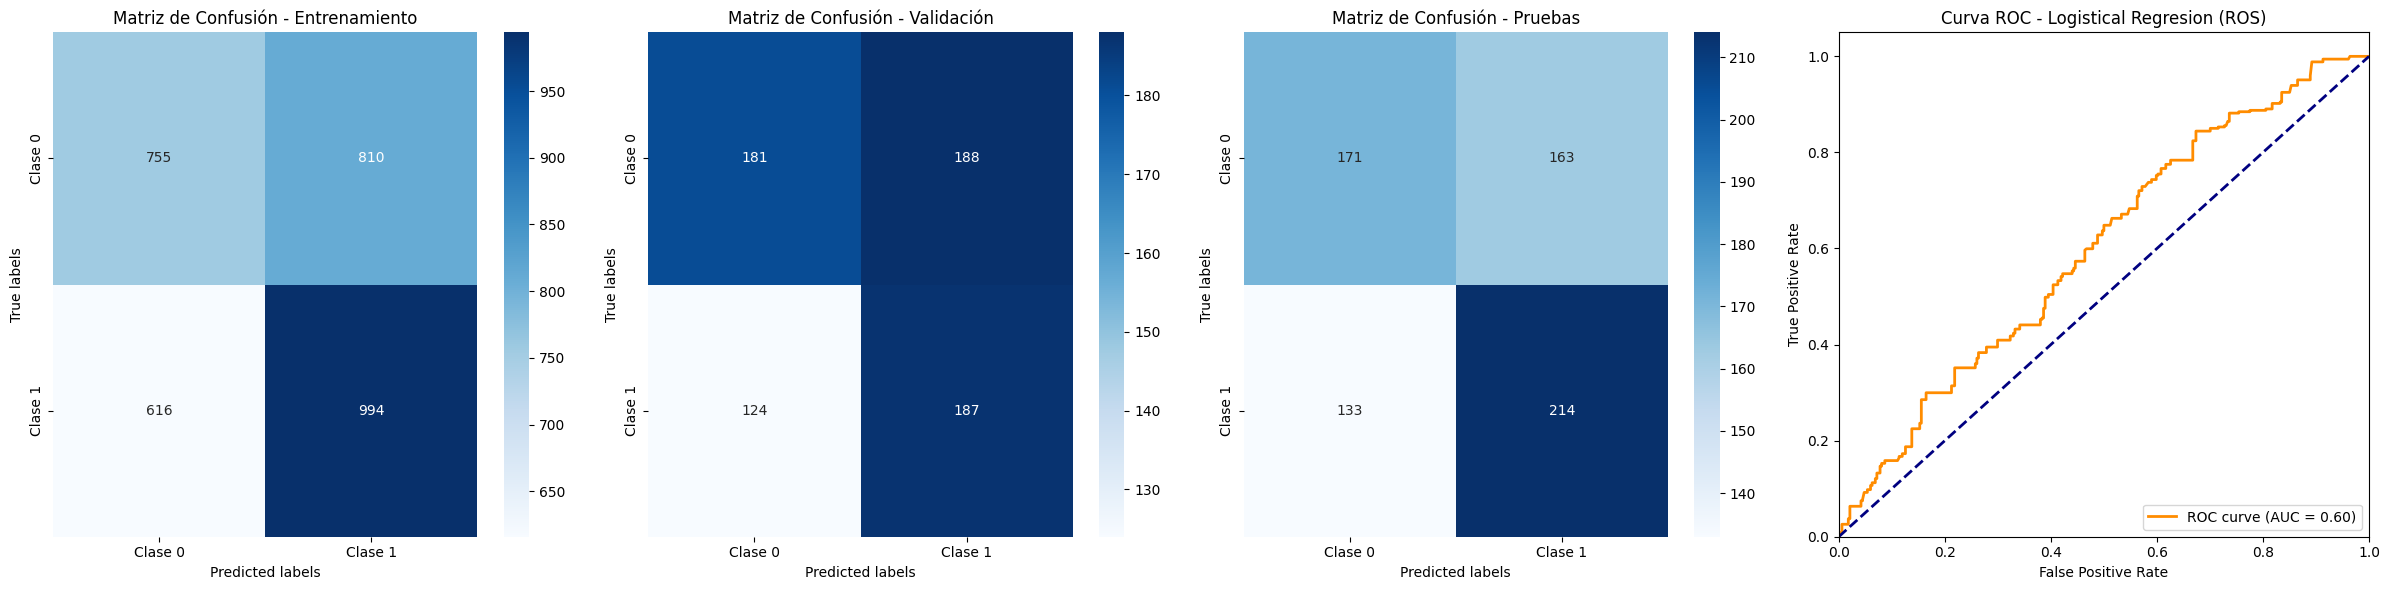

In [14]:
#EVALUACION DEL MODELO DE ML LOGISTICAL REGRESION
def metrics_model_lg(x,y):
    predictions=ros_modelLR.predict(x)
    accuracy_metric=accuracy_score(y,predictions)
    precision_metric=precision_score(y,predictions)
    recall_metric=recall_score(y,predictions)
    f1_metric=f1_score(y,predictions)
    tn,fp,fn,tp=confusion_matrix(y,predictions).ravel()
    specificity_metric=tn/(tn+fp)
    confusion_mat = confusion_matrix(y, predictions)
    return {'Accuracy': accuracy_metric, 'Precision': precision_metric, 'Recall': recall_metric, 'F1 score': f1_metric,'Specificity':specificity_metric},confusion_mat

train_results,ros_lg_mc_train= metrics_model_lg(ros_dataTrain, ros_targetTrain)
val_results,ros_lg_mc_val = metrics_model_lg(ros_dataVal, ros_targetVal)
test_results,ros_lg_mc_test = metrics_model_lg(ros_dataPrueba, ros_targetPrueba)
print(f'**METRICAS DE ENTRENAMIENTO LR:\n{train_results}')
print(f'**METRICAS DE VALIDACION LR:\n{val_results}')
print(f'**METRICAS DE PRUEBAS LR:\n{test_results}')

# Etiquetas para las clases (ajusta esto según tu caso)
labels = ['Clase 0', 'Clase 1']

# Crear una figura para las matrices de confusión y el AUC
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Función para dibujar un mapa de calor de la matriz de confusión
def plot_confusion_matrix_ros_lg(ax, cm, labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)

# Graficar las matrices de confusión
plot_confusion_matrix_ros_lg(axs[0], ros_lg_mc_train, labels, title='Matriz de Confusión - Entrenamiento')
plot_confusion_matrix_ros_lg(axs[1], ros_lg_mc_val, labels, title='Matriz de Confusión - Validación')
plot_confusion_matrix_ros_lg(axs[2], ros_lg_mc_test, labels, title='Matriz de Confusión - Pruebas')

# Cálculo y gráfica del AUC para el conjunto de pruebas
lg_ros_probs = ros_modelLR.predict_proba(ros_dataPrueba)[:, 1]
fpr, tpr, thresholds = roc_curve(ros_targetPrueba, lg_ros_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
axs[3].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3].set_xlim([0.0, 1.0])
axs[3].set_ylim([0.0, 1.05])
axs[3].set_xlabel('False Positive Rate')
axs[3].set_ylabel('True Positive Rate')
axs[3].set_title('Curva ROC - Logistical Regresion (ROS)')
axs[3].legend(loc="lower right")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()

##### BALANCEO CON DATOS BALANCEADOS CON SMOTE

In [15]:
#1. REALIZAMOS LA DISTRIBUCION DE NUESTROS DATOS BALANCEADOS EN DATOS DE ENTRENAMIENTO, VALIDACION y PRUEBA
sm_dataTrain,sm_dataTemp,sm_targetTrain,sm_targetTemp=train_test_split(dataSMOTE,targetSMOTE,test_size=0.3,random_state=42)
sm_dataVal, sm_dataPrueba, sm_targetVal, sm_targetPrueba = train_test_split(sm_dataTemp, sm_targetTemp, test_size=0.50, random_state=42)
#2. ENTRENAMIENTO DEL MODELO LR
#A) INICIALIZACION DEL MODELO
start_train_time=time.time()
sm_modelLR=LogisticRegression(random_state=42,penalty='l1',C=1,solver='liblinear')
sm_modelLR.fit(sm_dataTrain,sm_targetTrain)
end_train_time=time.time()
time_training_model=(end_train_time-start_train_time)
print(f"TIEMPO DE ENTRENAMIENTO DEL MODELO: {time_training_model}")

TIEMPO DE ENTRENAMIENTO DEL MODELO: 0.01700282096862793


**METRICAS DE ENTRENAMIENTO LR:
{'Accuracy': 0.6195275590551181, 'Precision': 0.6016177957532861, 'Recall': 0.7391304347826086, 'F1 score': 0.6633221850613155, 'Specificity': np.float64(0.4964856230031949)}
**METRICAS DE VALIDACION LR:
{'Accuracy': 0.6088235294117647, 'Precision': 0.5547445255474452, 'Recall': 0.7331189710610932, 'F1 score': 0.631578947368421, 'Specificity': np.float64(0.5040650406504065)}
**METRICAS DE PRUEBAS LR:
{'Accuracy': 0.6343612334801763, 'Precision': 0.6144859813084113, 'Recall': 0.7579250720461095, 'F1 score': 0.6787096774193548, 'Specificity': np.float64(0.5059880239520959)}


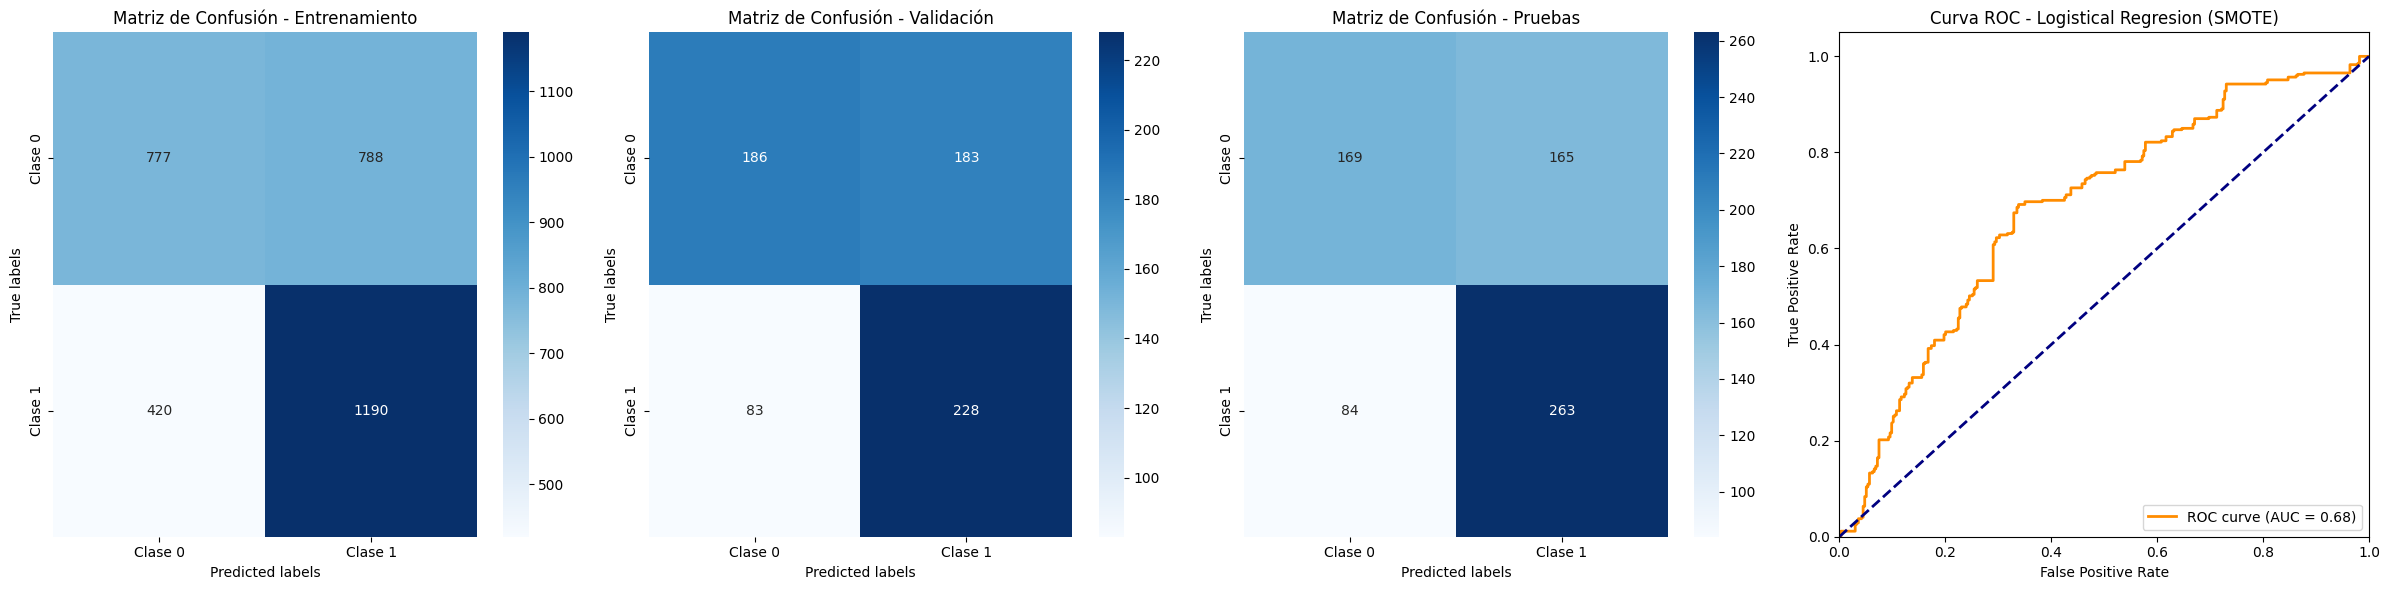

In [16]:
#EVALUACION DEL MODELO DE ML LOGISTICAL REGRESION
def metrics_model_lg_sm(x,y):
    predictions=sm_modelLR.predict(x)
    accuracy_metric=accuracy_score(y,predictions)
    precision_metric=precision_score(y,predictions)
    recall_metric=recall_score(y,predictions)
    f1_metric=f1_score(y,predictions)
    tn,fp,fn,tp=confusion_matrix(y,predictions).ravel()
    specificity_metric=tn/(tn+fp)
    confusion_mat = confusion_matrix(y, predictions)
    return {'Accuracy': accuracy_metric, 'Precision': precision_metric, 'Recall': recall_metric, 'F1 score': f1_metric,'Specificity':specificity_metric},confusion_mat

sm_train_results,sm_train_mc= metrics_model_lg_sm(sm_dataTrain, sm_targetTrain)
sm_val_results,sm_val_mc = metrics_model_lg_sm(sm_dataVal, sm_targetVal)
sm_test_results,sm_test_mc = metrics_model_lg_sm(sm_dataPrueba, sm_targetPrueba)
print(f'**METRICAS DE ENTRENAMIENTO LR:\n{sm_train_results}')
print(f'**METRICAS DE VALIDACION LR:\n{sm_val_results}')
print(f'**METRICAS DE PRUEBAS LR:\n{sm_test_results}')


# Etiquetas para las clases (ajusta esto según tu caso)
labels = ['Clase 0', 'Clase 1']

# Crear una figura para las matrices de confusión y el AUC
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Función para dibujar un mapa de calor de la matriz de confusión
def plot_confusion_matrix_sm_lg(ax, cm, labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)

# Graficar las matrices de confusión
plot_confusion_matrix_sm_lg(axs[0], sm_train_mc, labels, title='Matriz de Confusión - Entrenamiento')
plot_confusion_matrix_sm_lg(axs[1], sm_val_mc, labels, title='Matriz de Confusión - Validación')
plot_confusion_matrix_sm_lg(axs[2], sm_test_mc, labels, title='Matriz de Confusión - Pruebas')

# Cálculo y gráfica del AUC para el conjunto de pruebas
lg_sm_probs = sm_modelLR.predict_proba(sm_dataPrueba)[:, 1]
fpr, tpr, thresholds = roc_curve(sm_targetPrueba, lg_sm_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
axs[3].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3].set_xlim([0.0, 1.0])
axs[3].set_ylim([0.0, 1.05])
axs[3].set_xlabel('False Positive Rate')
axs[3].set_ylabel('True Positive Rate')
axs[3].set_title('Curva ROC - Logistical Regresion (SMOTE)')
axs[3].legend(loc="lower right")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()

#### RANDOM FOREST

##### ROS

In [17]:
#Random Forest (RF)
#1. Distribución del conjunto de datos balanceados en datos de entrenamiento, validación y prueba.
rf_ros_dataTrain,rf_ros_dataTemp,rf_ros_targetTrain,rf_ros_targetTemp=train_test_split(dataROS,targetROS,test_size=0.30,random_state=42)
rf_ros_dataVal, rf_ros_dataPrueba,rf_ros_targetVal, rf_ros_targetPrueba = train_test_split(rf_ros_dataTemp,rf_ros_targetTemp, test_size=0.50, random_state=42)
#2. Entrenamiento del modelo RF
start_train_time=time.time() #Inicio del tiempo de entrenamiento
#a) Inicialización del modelo RF
ros_modelRF=RandomForestClassifier(random_state=42,criterion='gini',max_features='sqrt' )
#b). Entrenamiento del modelo RF
ros_modelRF.fit(rf_ros_dataTrain,rf_ros_targetTrain)
end_train_time=time.time() #Fin del tiempo de entrenamiento
time_training_model=(end_train_time-start_train_time)
print(f"Tiempo del entrenamiento del modelo RF: {time_training_model}")

Tiempo del entrenamiento del modelo RF: 0.31440114974975586


**METRICAS DE ENTRENAMIENTO RF:
{'Accuracy': 0.9858267716535433, 'Precision': 0.972809667673716, 'Recall': 1.0, 'F1 score': 0.9862174578866769, 'Specificity': np.float64(0.9712460063897763)}
**METRICAS DE VALIDACION RF:
{'Accuracy': 0.95, 'Precision': 0.9014492753623189, 'Recall': 1.0, 'F1 score': 0.948170731707317, 'Specificity': np.float64(0.907859078590786)}
**METRICAS DE PRUEBAS RF:
{'Accuracy': 0.9618208516886931, 'Precision': 0.9302949061662198, 'Recall': 1.0, 'F1 score': 0.9638888888888889, 'Specificity': np.float64(0.9221556886227545)}


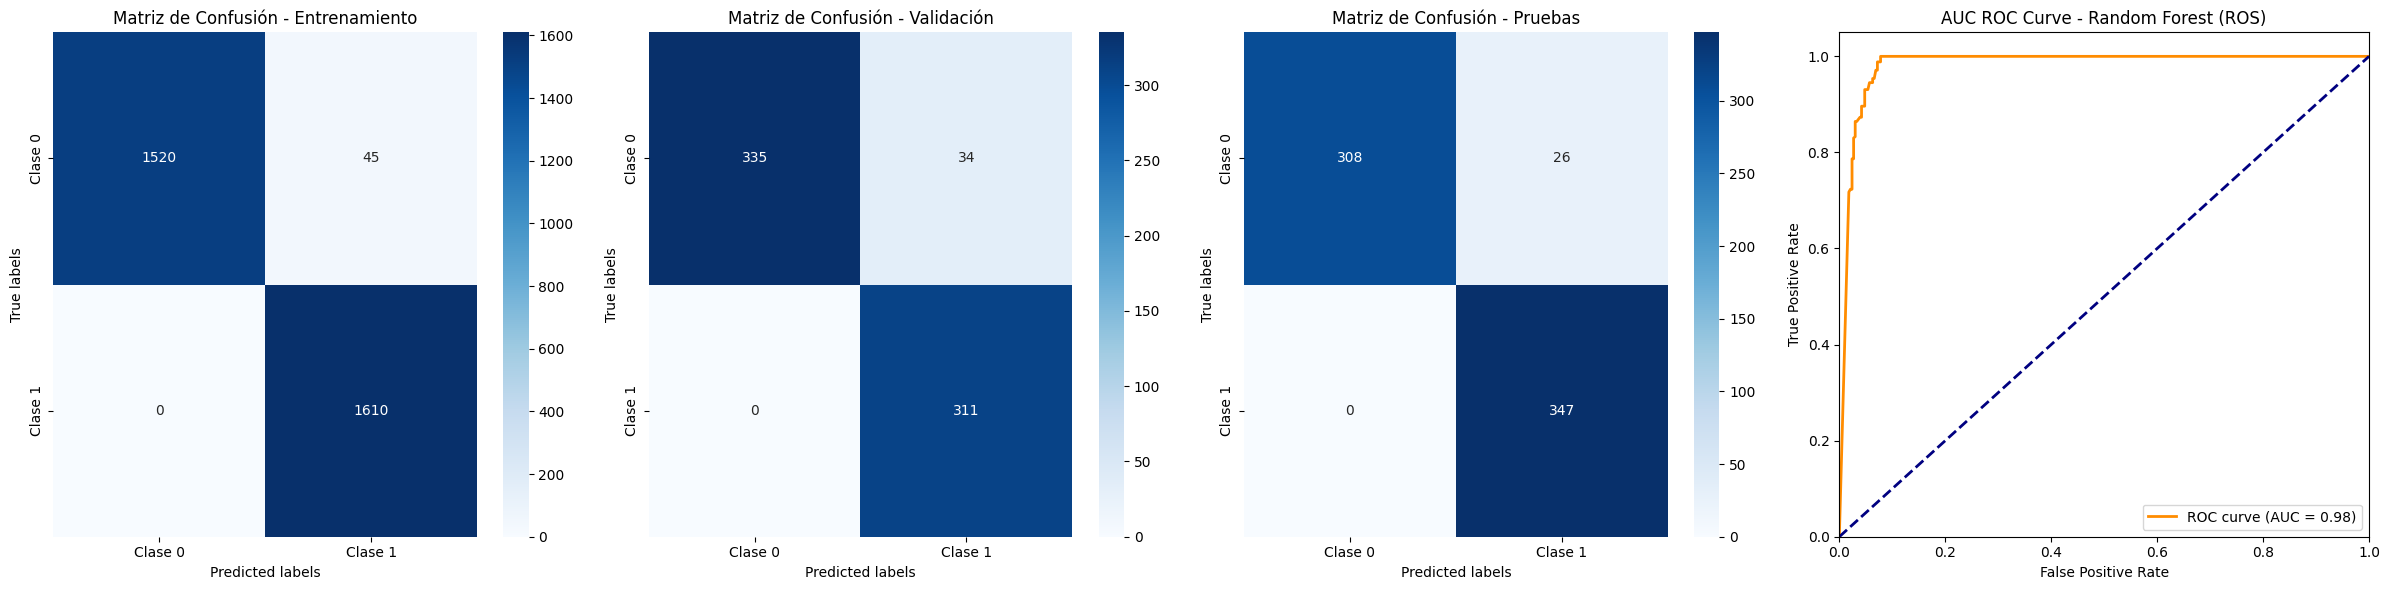

In [18]:
# Función para calcular las métricas y obtener la matriz de confusión
def metrics_model_rf_ros(x, y):
    predictions = ros_modelRF.predict(x)
    accuracy_metric = accuracy_score(y, predictions)
    precision_metric = precision_score(y, predictions)
    recall_metric = recall_score(y, predictions)
    f1_metric = f1_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    specificity_metric = tn / (tn + fp)
    confusion_mat = confusion_matrix(y, predictions)
    return {
        'Accuracy': accuracy_metric, 
        'Precision': precision_metric, 
        'Recall': recall_metric, 
        'F1 score': f1_metric, 
        'Specificity': specificity_metric
    }, confusion_mat

# Calcular las métricas y matrices de confusión para entrenamiento, validación y pruebas
rf_ros_train_results, train_mat_conf_rf_ros = metrics_model_rf_ros(rf_ros_dataTrain, rf_ros_targetTrain)
rf_ros_val_results, val_mat_conf_rf_ros = metrics_model_rf_ros(rf_ros_dataVal, rf_ros_targetVal)
rf_ros_test_results, test_mat_conf_rf_ros = metrics_model_rf_ros(rf_ros_dataPrueba, rf_ros_targetPrueba)

# Imprimir los resultados
print(f'**METRICAS DE ENTRENAMIENTO RF:\n{rf_ros_train_results}')
print(f'**METRICAS DE VALIDACION RF:\n{rf_ros_val_results}')
print(f'**METRICAS DE PRUEBAS RF:\n{rf_ros_test_results}')

# Etiquetas para las clases (ajusta esto según tu caso)
labels = ['Clase 0', 'Clase 1']

# Crear una figura para las matrices de confusión y el AUC
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Función para dibujar un mapa de calor de la matriz de confusión
def plot_confusion_matrix_ros(ax, cm, labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)

# Graficar las matrices de confusión
plot_confusion_matrix_ros(axs[0], train_mat_conf_rf_ros, labels, title='Matriz de Confusión - Entrenamiento')
plot_confusion_matrix_ros(axs[1], val_mat_conf_rf_ros, labels, title='Matriz de Confusión - Validación')
plot_confusion_matrix_ros(axs[2], test_mat_conf_rf_ros, labels, title='Matriz de Confusión - Pruebas')

# Cálculo y gráfica del AUC para el conjunto de pruebas
rf_ros_probs = ros_modelRF.predict_proba(rf_ros_dataPrueba)[:, 1]
fpr, tpr, thresholds = roc_curve(rf_ros_targetPrueba, rf_ros_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
axs[3].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3].set_xlim([0.0, 1.0])
axs[3].set_ylim([0.0, 1.05])
axs[3].set_xlabel('False Positive Rate')
axs[3].set_ylabel('True Positive Rate')
axs[3].set_title('AUC ROC Curve - Random Forest (ROS)')
axs[3].legend(loc="lower right")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()

##### SMOTE

In [19]:
#1. REALIZAMOS LA DISTRIBUCION DE NUESTROS DATOS BALANCEADOS EN DATOS DE ENTRENAMIENTO, VALIDACION y PRUEBA
rf_smote_dataTrain,rf_smote_dataTemp,rf_smote_targetTrain,rf_smote_targetTemp=train_test_split(dataSMOTE,targetSMOTE,test_size=0.30,random_state=42)
rf_smote_dataVal, rf_smote_dataPrueba,rf_smote_targetVal, rf_smote_targetPrueba = train_test_split(rf_smote_dataTemp,rf_smote_targetTemp, test_size=0.50, random_state=42)
#2. ENTRENAMIENTO DEL MODELO RF
#A) INICIALIZACION DEL MODELO
start_train_time=time.time()
smote_modelRF=RandomForestClassifier(random_state=42,criterion='gini',max_features='sqrt' )
smote_modelRF.fit(rf_smote_dataTrain,rf_smote_targetTrain)
end_train_time=time.time()
time_training_model=(end_train_time-start_train_time)
print(f"TIEMPO DE ENTRENAMIENTO DEL MODELO: {time_training_model}")

TIEMPO DE ENTRENAMIENTO DEL MODELO: 0.4039192199707031


**METRICAS DE ENTRENAMIENTO RF:
{'Accuracy': 0.9896062992125985, 'Precision': 0.9858287122612446, 'Recall': 0.9937888198757764, 'F1 score': 0.9897927621404269, 'Specificity': np.float64(0.9853035143769968)}
**METRICAS DE VALIDACION RF:
{'Accuracy': 0.8147058823529412, 'Precision': 0.7828746177370031, 'Recall': 0.8231511254019293, 'F1 score': 0.8025078369905956, 'Specificity': np.float64(0.8075880758807588)}
**METRICAS DE PRUEBAS RF:
{'Accuracy': 0.8208516886930984, 'Precision': 0.8223495702005731, 'Recall': 0.8270893371757925, 'F1 score': 0.8247126436781609, 'Specificity': np.float64(0.8143712574850299)}


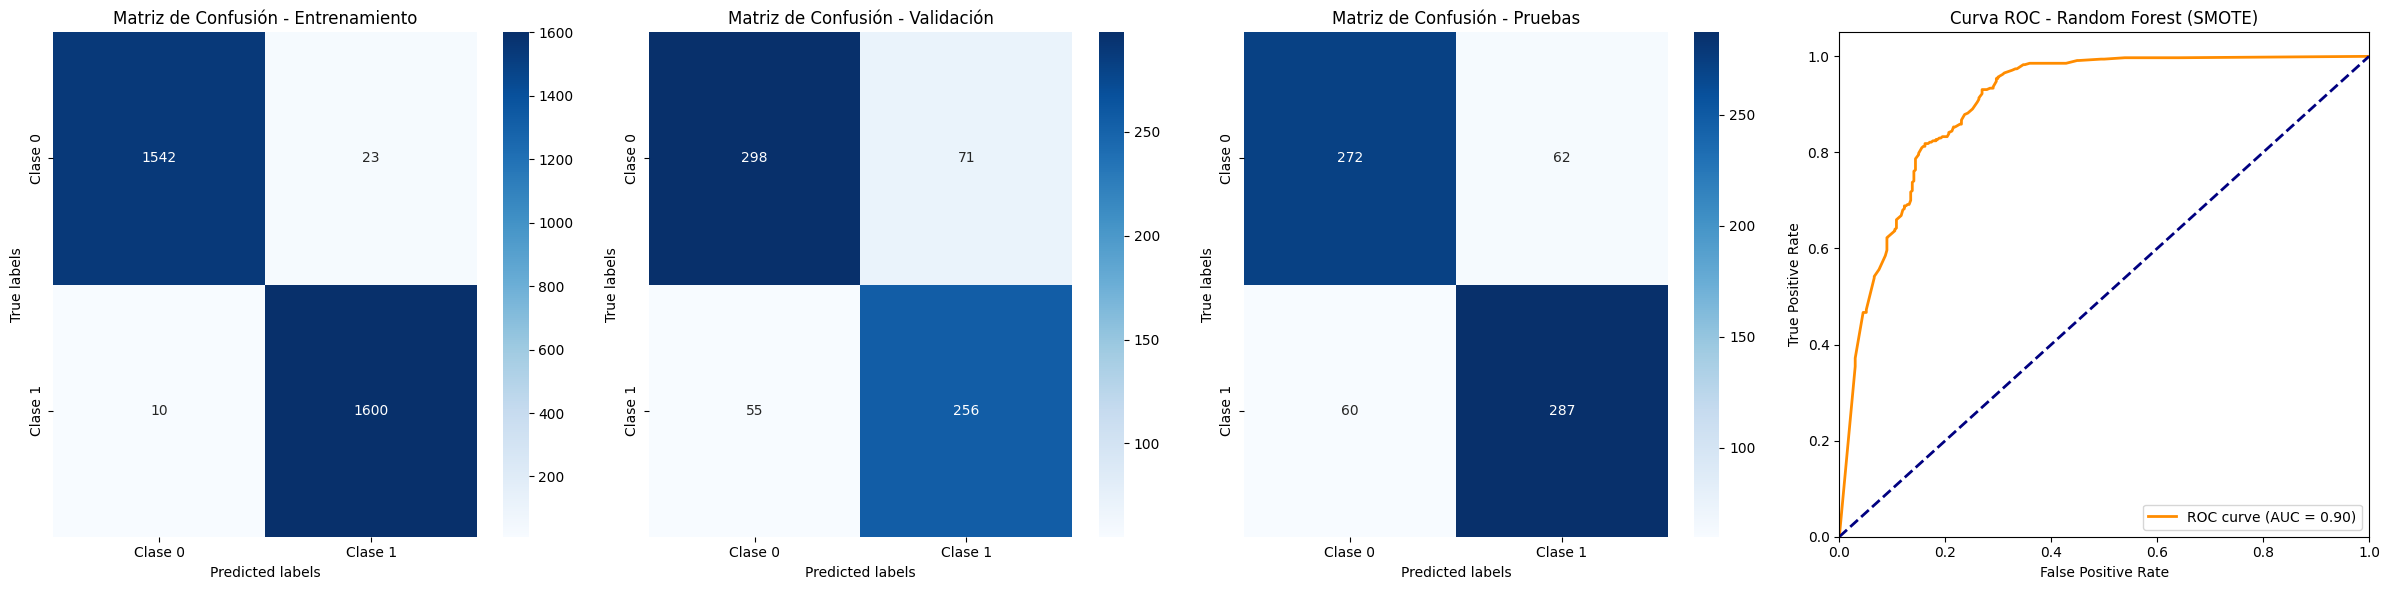

VALIDACION CRUZADA ESTIMACION: [0.8488189  0.80314961 0.80944882 0.78425197 0.81889764]
MEDIA VALIDACION CRUZADA ESTIMACION: 0.8129133858267716


In [20]:
# Función para dibujar un mapa de calor de la matriz de confusión
def plot_confusion_matrix_smote(ax, cm, labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)

# EVALUACIÓN DEL MODELO DE ML RANDOM FOREST con SMOTE
def metrics_model_rf_smote(x, y):
    predictions = smote_modelRF.predict(x)
    accuracy_metric = accuracy_score(y, predictions)
    precision_metric = precision_score(y, predictions)
    recall_metric = recall_score(y, predictions)
    f1_metric = f1_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    specificity_metric = tn / (tn + fp)
    confusion_mat = confusion_matrix(y, predictions)
    return {
        'Accuracy': accuracy_metric, 
        'Precision': precision_metric, 
        'Recall': recall_metric, 
        'F1 score': f1_metric, 
        'Specificity': specificity_metric
    }, confusion_mat

# Calcular las métricas y matrices de confusión para entrenamiento, validación y pruebas
rf_smote_train_results, train_mat_conf_rf_smote = metrics_model_rf_smote(rf_smote_dataTrain, rf_smote_targetTrain)
rf_smote_val_results, val_mat_conf_rf_smote = metrics_model_rf_smote(rf_smote_dataVal, rf_smote_targetVal)
rf_smote_test_results, test_mat_conf_rf_smote = metrics_model_rf_smote(rf_smote_dataPrueba, rf_smote_targetPrueba)

print(f'**METRICAS DE ENTRENAMIENTO RF:\n{rf_smote_train_results}')
print(f'**METRICAS DE VALIDACION RF:\n{rf_smote_val_results}')
print(f'**METRICAS DE PRUEBAS RF:\n{rf_smote_test_results}')

# Etiquetas para las clases (ajusta esto según tu caso)
labels = ['Clase 0', 'Clase 1']

# Crear una figura con subgráficos en una fila
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Graficar las matrices de confusión en cada subgráfico
plot_confusion_matrix_smote(axs[0], train_mat_conf_rf_smote, labels, title='Matriz de Confusión - Entrenamiento')
plot_confusion_matrix_smote(axs[1], val_mat_conf_rf_smote, labels, title='Matriz de Confusión - Validación')
plot_confusion_matrix_smote(axs[2], test_mat_conf_rf_smote, labels, title='Matriz de Confusión - Pruebas')

# Cálculo y gráfica del AUC para el conjunto de pruebas
rf_smote_probs = smote_modelRF.predict_proba(rf_smote_dataPrueba)[:, 1]
fpr, tpr, thresholds = roc_curve(rf_smote_targetPrueba, rf_smote_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC en el cuarto subgráfico
axs[3].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3].set_xlim([0.0, 1.0])
axs[3].set_ylim([0.0, 1.05])
axs[3].set_xlabel('False Positive Rate')
axs[3].set_ylabel('True Positive Rate')
axs[3].set_title('Curva ROC - Random Forest (SMOTE)')
axs[3].legend(loc="lower right")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()

# Mostrar los resultados de la validación cruzada
cv_scores = cross_val_score(smote_modelRF, rf_smote_dataTrain, rf_smote_targetTrain, cv=5)
print(f"VALIDACION CRUZADA ESTIMACION: {cv_scores}")
print(f"MEDIA VALIDACION CRUZADA ESTIMACION: {cv_scores.mean()}")

#### DECISION TREE

##### ROS

In [21]:
#1. REALIZAMOS LA DISTRIBUCION DE NUESTROS DATOS BALANCEADOS EN DATOS DE ENTRENAMIENTO, VALIDACION y PRUEBA
dt_ros_dataTrain,dt_ros_dataTemp,dt_ros_targetTrain,dt_ros_targetTemp=train_test_split(dataROS,targetROS,test_size=0.3,random_state=42)
dt_ros_dataVal, dt_ros_dataPrueba,dt_ros_targetVal, dt_ros_targetPrueba = train_test_split(dt_ros_dataTemp,dt_ros_targetTemp, test_size=0.50, random_state=42)
#2. ENTRENAMIENTO DEL MODELO DT
#A) INICIALIZACION DEL MODELO
start_train_time=time.time()
ros_modelDT=DecisionTreeClassifier(criterion='gini',max_features='sqrt',max_leaf_nodes=None,min_samples_leaf=10 )
ros_modelDT.fit(dt_ros_dataTrain,dt_ros_targetTrain)
end_train_time=time.time()
time_training_model=(end_train_time-start_train_time)
print(f"TIEMPO DE ENTRENAMIENTO DEL MODELO: {time_training_model}")

TIEMPO DE ENTRENAMIENTO DEL MODELO: 0.006757259368896484


**METRICAS DE ENTRENAMIENTO DT:
{'Accuracy': 0.8768503937007874, 'Precision': 0.8310700706137969, 'Recall': 0.9503105590062112, 'F1 score': 0.8866995073891626, 'Specificity': np.float64(0.8012779552715655)}
**METRICAS DE VALIDACION DT:
{'Accuracy': 0.85, 'Precision': 0.7700258397932817, 'Recall': 0.9581993569131833, 'F1 score': 0.8538681948424068, 'Specificity': np.float64(0.7588075880758808)}
**METRICAS DE PRUEBAS DT:
{'Accuracy': 0.8516886930983847, 'Precision': 0.8075, 'Recall': 0.930835734870317, 'F1 score': 0.8647925033467202, 'Specificity': np.float64(0.7694610778443114)}


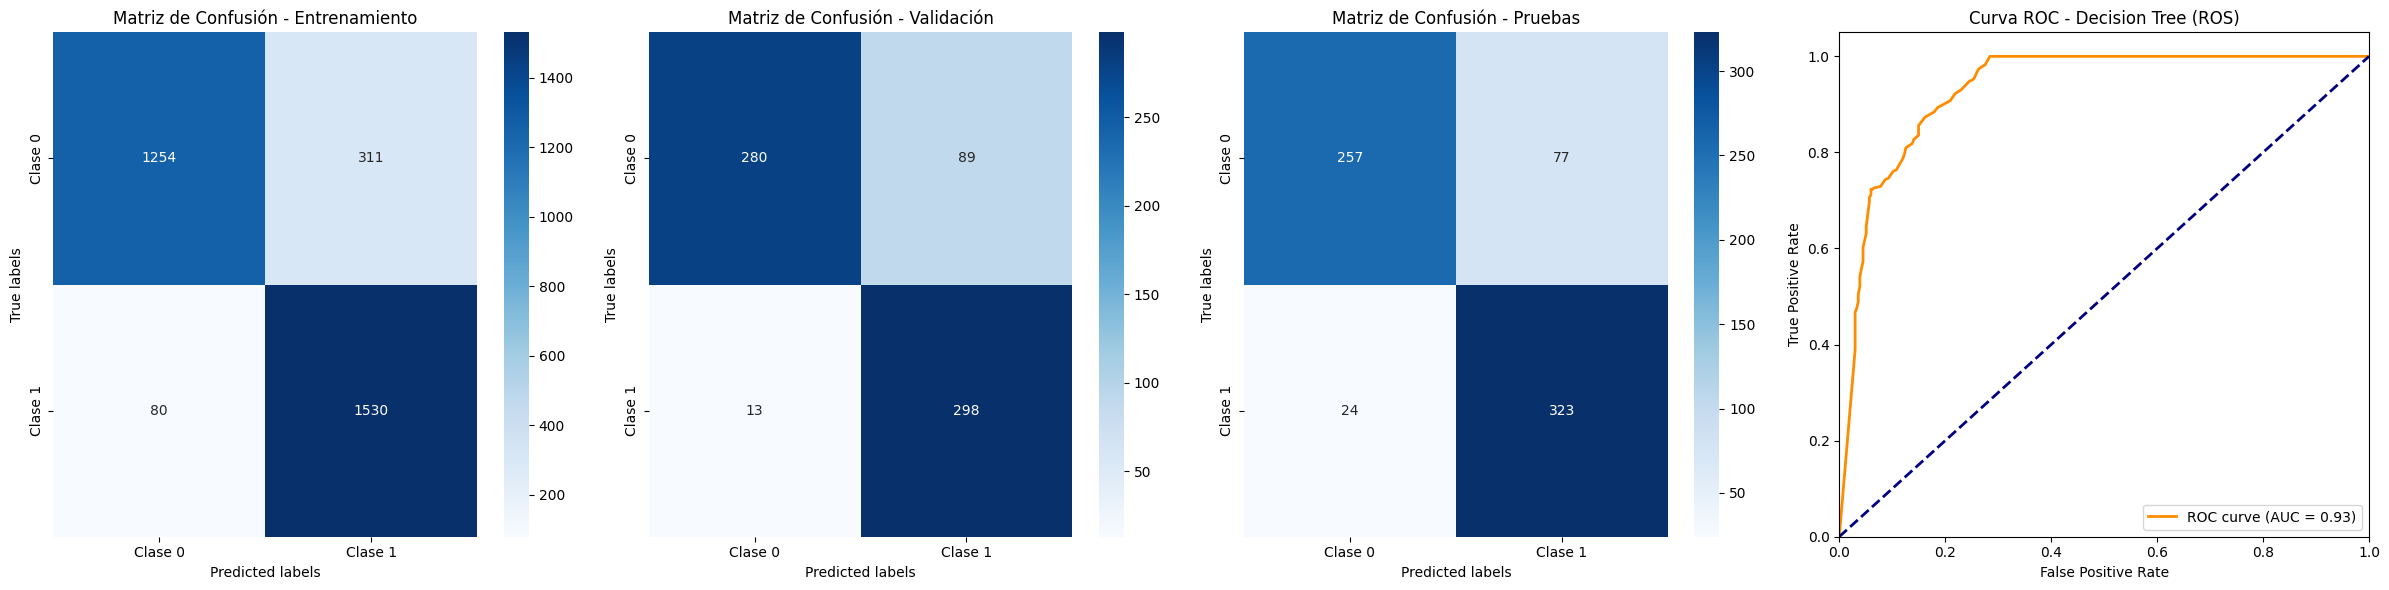

In [22]:
# Función para calcular las métricas y obtener la matriz de confusión
def metrics_model_dt_ros(x, y):
    predictions = ros_modelDT.predict(x)
    accuracy_metric = accuracy_score(y, predictions)
    precision_metric = precision_score(y, predictions)
    recall_metric = recall_score(y, predictions)
    f1_metric = f1_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    specificity_metric = tn / (tn + fp)
    confusion_mat = confusion_matrix(y, predictions)
    return {
        'Accuracy': accuracy_metric, 
        'Precision': precision_metric, 
        'Recall': recall_metric, 
        'F1 score': f1_metric, 
        'Specificity': specificity_metric
    }, confusion_mat

# Calcular las métricas y matrices de confusión para entrenamiento, validación y pruebas
dt_ros_train_results, train_mat_conf_dt_ros = metrics_model_dt_ros(dt_ros_dataTrain, dt_ros_targetTrain)
dt_ros_val_results, val_mat_conf_dt_ros = metrics_model_dt_ros(dt_ros_dataVal, dt_ros_targetVal)
dt_ros_test_results, test_mat_conf_dt_ros = metrics_model_dt_ros(dt_ros_dataPrueba, dt_ros_targetPrueba)

# Imprimir los resultados
print(f'**METRICAS DE ENTRENAMIENTO DT:\n{dt_ros_train_results}')
print(f'**METRICAS DE VALIDACION DT:\n{dt_ros_val_results}')
print(f'**METRICAS DE PRUEBAS DT:\n{dt_ros_test_results}')

# Etiquetas para las clases (ajusta esto según tu caso)
labels = ['Clase 0', 'Clase 1']

# Crear una figura para las matrices de confusión y el AUC
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Función para dibujar un mapa de calor de la matriz de confusión
def plot_confusion_matrix_dt_ros(ax, cm, labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)

# Graficar las matrices de confusión
plot_confusion_matrix_dt_ros(axs[0], train_mat_conf_dt_ros, labels, title='Matriz de Confusión - Entrenamiento')
plot_confusion_matrix_dt_ros(axs[1], val_mat_conf_dt_ros, labels, title='Matriz de Confusión - Validación')
plot_confusion_matrix_dt_ros(axs[2], test_mat_conf_dt_ros, labels, title='Matriz de Confusión - Pruebas')

# Cálculo y gráfica del AUC para el conjunto de pruebas
dt_ros_probs = ros_modelDT.predict_proba(dt_ros_dataPrueba)[:, 1]
fpr, tpr, thresholds = roc_curve(dt_ros_targetPrueba, dt_ros_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
axs[3].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3].set_xlim([0.0, 1.0])
axs[3].set_ylim([0.0, 1.05])
axs[3].set_xlabel('False Positive Rate')
axs[3].set_ylabel('True Positive Rate')
axs[3].set_title('Curva ROC - Decision Tree (ROS)')
axs[3].legend(loc="lower right")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()

##### SMOTE

In [23]:
#1. REALIZAMOS LA DISTRIBUCION DE NUESTROS DATOS BALANCEADOS EN DATOS DE ENTRENAMIENTO, VALIDACION y PRUEBA
dt_smote_dataTrain,dt_smote_dataTemp,dt_smote_targetTrain,dt_smote_targetTemp=train_test_split(dataSMOTE,targetSMOTE,test_size=0.3,random_state=42)
dt_smote_dataVal, dt_smote_dataPrueba,dt_smote_targetVal, dt_smote_targetPrueba = train_test_split(dt_smote_dataTemp,dt_smote_targetTemp, test_size=0.50, random_state=42)
#2. ENTRENAMIENTO DEL MODELO DT
#A) INICIALIZACION DEL MODELO
start_train_time=time.time()
smote_modelDT=DecisionTreeClassifier(criterion='gini',max_features='sqrt',max_leaf_nodes=None,min_samples_leaf=10 )
smote_modelDT.fit(dt_smote_dataTrain,dt_smote_targetTrain)
end_train_time=time.time()
time_training_model=(end_train_time-start_train_time)
print(f"TIEMPO DE ENTRENAMIENTO DEL MODELO: {time_training_model}")

TIEMPO DE ENTRENAMIENTO DEL MODELO: 0.007618904113769531


**METRICAS DE ENTRENAMIENTO DT:
{'Accuracy': 0.8554330708661417, 'Precision': 0.8415430267062315, 'Recall': 0.8807453416149068, 'F1 score': 0.8606980273141123, 'Specificity': np.float64(0.8293929712460064)}
**METRICAS DE VALIDACION DT:
{'Accuracy': 0.8117647058823529, 'Precision': 0.7731343283582089, 'Recall': 0.8327974276527331, 'F1 score': 0.8018575851393189, 'Specificity': np.float64(0.7940379403794038)}
**METRICAS DE PRUEBAS DT:
{'Accuracy': 0.8046989720998532, 'Precision': 0.783068783068783, 'Recall': 0.8530259365994236, 'F1 score': 0.8165517241379311, 'Specificity': np.float64(0.7544910179640718)}


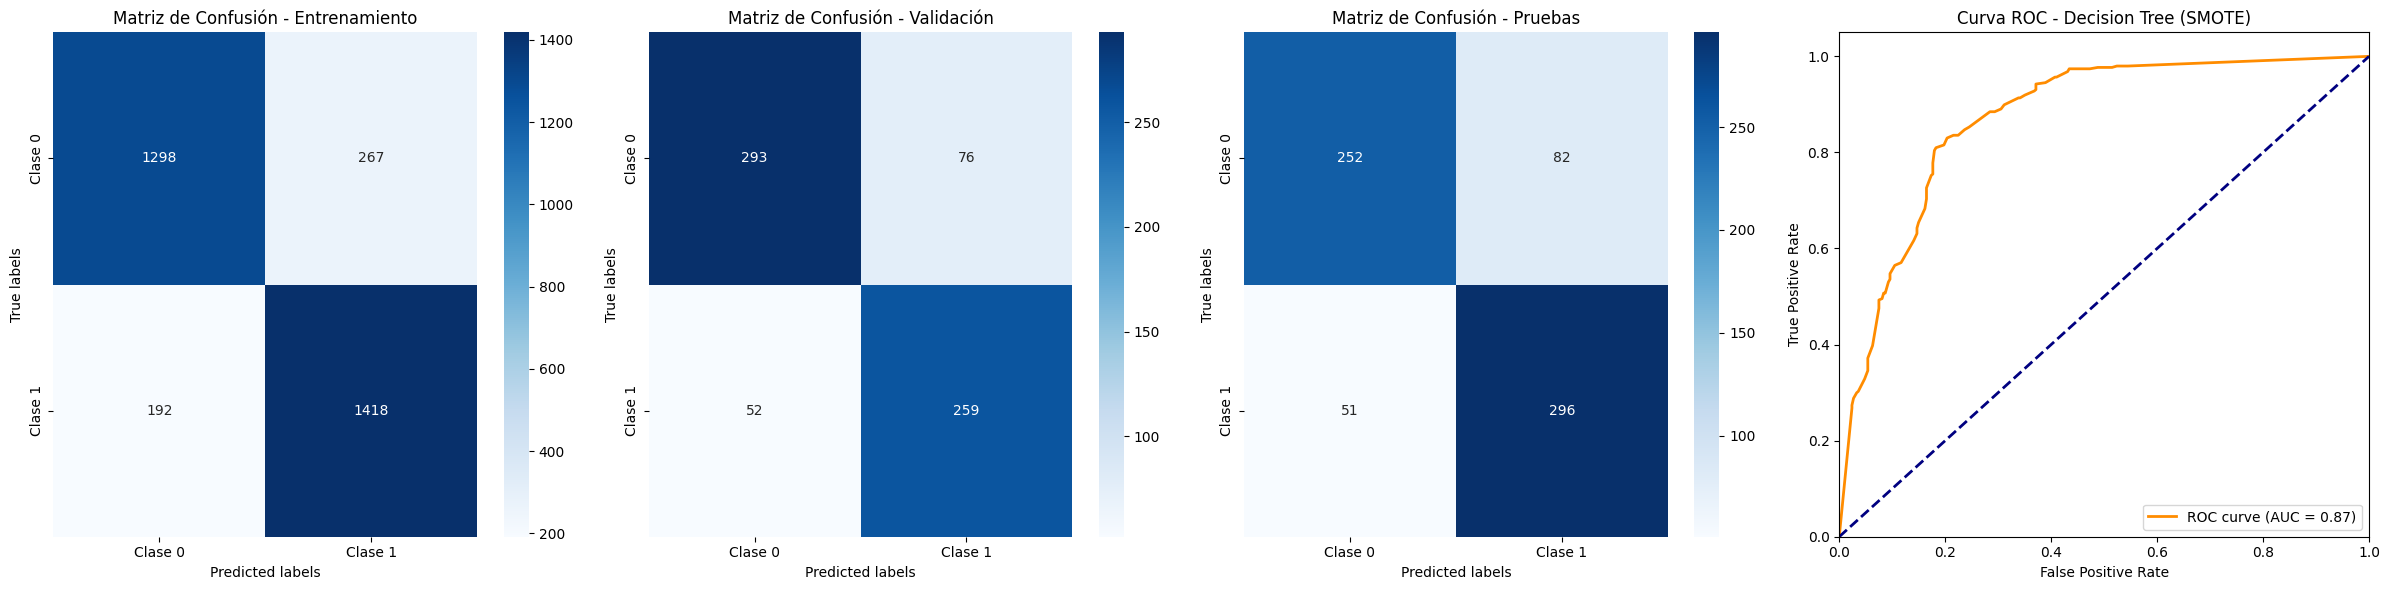

In [24]:
# Función para calcular las métricas y obtener la matriz de confusión
def metrics_model_dt_smote(x, y):
    predictions = smote_modelDT.predict(x)
    accuracy_metric = accuracy_score(y, predictions)
    precision_metric = precision_score(y, predictions)
    recall_metric = recall_score(y, predictions)
    f1_metric = f1_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    specificity_metric = tn / (tn + fp)
    confusion_mat = confusion_matrix(y, predictions)
    return {
        'Accuracy': accuracy_metric, 
        'Precision': precision_metric, 
        'Recall': recall_metric, 
        'F1 score': f1_metric, 
        'Specificity': specificity_metric
    }, confusion_mat

# Calcular las métricas y matrices de confusión para entrenamiento, validación y pruebas
dt_smote_train_results, train_mat_conf_dt_smote = metrics_model_dt_smote(dt_smote_dataTrain, dt_smote_targetTrain)
dt_smote_val_results, val_mat_conf_dt_smote = metrics_model_dt_smote(dt_smote_dataVal, dt_smote_targetVal)
dt_smote_test_results, test_mat_conf_dt_smote = metrics_model_dt_smote(dt_smote_dataPrueba, dt_smote_targetPrueba)

# Imprimir los resultados
print(f'**METRICAS DE ENTRENAMIENTO DT:\n{dt_smote_train_results}')
print(f'**METRICAS DE VALIDACION DT:\n{dt_smote_val_results}')
print(f'**METRICAS DE PRUEBAS DT:\n{dt_smote_test_results}')

# Etiquetas para las clases (ajusta esto según tu caso)
labels = ['Clase 0', 'Clase 1']

# Crear una figura para las matrices de confusión y el AUC
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Función para dibujar un mapa de calor de la matriz de confusión
def plot_confusion_matrix_dt_smote(ax, cm, labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)

# Graficar las matrices de confusión
plot_confusion_matrix_dt_smote(axs[0], train_mat_conf_dt_smote, labels, title='Matriz de Confusión - Entrenamiento')
plot_confusion_matrix_dt_smote(axs[1], val_mat_conf_dt_smote, labels, title='Matriz de Confusión - Validación')
plot_confusion_matrix_dt_smote(axs[2], test_mat_conf_dt_smote, labels, title='Matriz de Confusión - Pruebas')

# Cálculo y gráfica del AUC para el conjunto de pruebas
dt_smote_probs = smote_modelDT.predict_proba(dt_smote_dataPrueba)[:, 1]
fpr, tpr, thresholds = roc_curve(dt_smote_targetPrueba, dt_smote_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
axs[3].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3].set_xlim([0.0, 1.0])
axs[3].set_ylim([0.0, 1.05])
axs[3].set_xlabel('False Positive Rate')
axs[3].set_ylabel('True Positive Rate')
axs[3].set_title('Curva ROC - Decision Tree (SMOTE)')
axs[3].legend(loc="lower right")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()

#### KNN

##### SMOTE

In [25]:
#1. REALIZAMOS LA DISTRIBUCION DE NUESTROS DATOS BALANCEADOS EN DATOS DE ENTRENAMIENTO, VALIDACION y PRUEBA
knn_smote_dataTrain,knn_smote_dataTemp,knn_smote_targetTrain,knn_smote_targetTemp=train_test_split(dataSMOTE,targetSMOTE,test_size=0.3,random_state=42)
knn_smote_dataVal, knn_smote_dataPrueba,knn_smote_targetVal, knn_smote_targetPrueba = train_test_split(knn_smote_dataTemp,knn_smote_targetTemp, test_size=0.50, random_state=42)
#2. ENTRENAMIENTO DEL MODELO KNN
#A) INICIALIZACION DEL MODELO
start_train_time=time.time()
smote_modelKNN=KNeighborsClassifier(leaf_size=20,weights='uniform',n_neighbors=5,p=2)
smote_modelKNN.fit(knn_smote_dataTrain,knn_smote_targetTrain)
end_train_time=time.time()
time_training_model=(end_train_time-start_train_time)
print(f"TIEMPO DE ENTRENAMIENTO DEL MODELO: {time_training_model}")

TIEMPO DE ENTRENAMIENTO DEL MODELO: 0.006888866424560547


**METRICAS DE ENTRENAMIENTO KNN (SMOTE):
{'Accuracy': 0.864251968503937, 'Precision': 0.8177897574123989, 'Recall': 0.9422360248447205, 'F1 score': 0.8756132756132756, 'Specificity': np.float64(0.7840255591054313)}
**METRICAS DE VALIDACION KNN (SMOTE):
{'Accuracy': 0.8220588235294117, 'Precision': 0.7486910994764397, 'Recall': 0.9196141479099679, 'F1 score': 0.8253968253968254, 'Specificity': np.float64(0.7398373983739838)}
**METRICAS DE PRUEBAS KNN (SMOTE):
{'Accuracy': 0.8135095447870778, 'Precision': 0.7606635071090048, 'Recall': 0.9250720461095101, 'F1 score': 0.834850455136541, 'Specificity': np.float64(0.6976047904191617)}


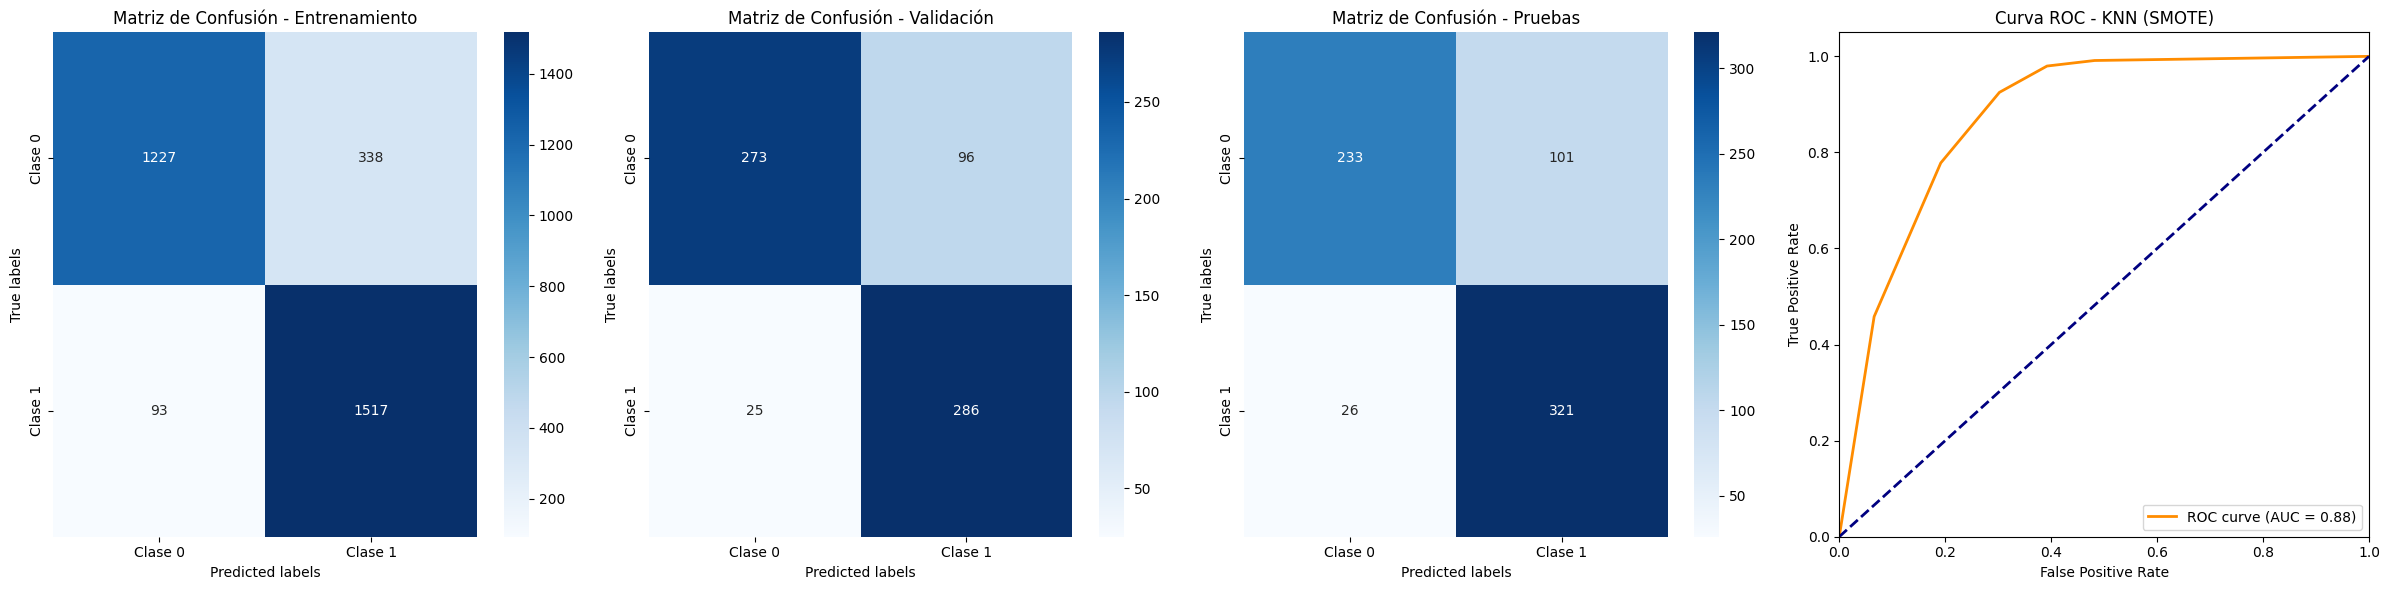

In [26]:
# Función para calcular las métricas y obtener la matriz de confusión
def metrics_model_knn_smote(x, y):
    predictions = smote_modelKNN.predict(x)
    accuracy_metric = accuracy_score(y, predictions)
    precision_metric = precision_score(y, predictions)
    recall_metric = recall_score(y, predictions)
    f1_metric = f1_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    specificity_metric = tn / (tn + fp)
    confusion_mat = confusion_matrix(y, predictions)
    return {
        'Accuracy': accuracy_metric, 
        'Precision': precision_metric, 
        'Recall': recall_metric, 
        'F1 score': f1_metric, 
        'Specificity': specificity_metric
    }, confusion_mat

# Calcular las métricas y matrices de confusión para entrenamiento, validación y pruebas
knn_smote_train_results, train_mat_conf_knn_smote = metrics_model_knn_smote(knn_smote_dataTrain, knn_smote_targetTrain)
knn_smote_val_results, val_mat_conf_knn_smote = metrics_model_knn_smote(knn_smote_dataVal, knn_smote_targetVal)
knn_smote_test_results, test_mat_conf_knn_smote = metrics_model_knn_smote(knn_smote_dataPrueba, knn_smote_targetPrueba)

# Imprimir los resultados
print(f'**METRICAS DE ENTRENAMIENTO KNN (SMOTE):\n{knn_smote_train_results}')
print(f'**METRICAS DE VALIDACION KNN (SMOTE):\n{knn_smote_val_results}')
print(f'**METRICAS DE PRUEBAS KNN (SMOTE):\n{knn_smote_test_results}')

# Etiquetas para las clases (ajusta esto según tu caso)
labels = ['Clase 0', 'Clase 1']

# Crear una figura para las matrices de confusión y el AUC
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Función para dibujar un mapa de calor de la matriz de confusión
def plot_confusion_matrix_knn_smote(ax, cm, labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)

# Graficar las matrices de confusión
plot_confusion_matrix_knn_smote(axs[0], train_mat_conf_knn_smote, labels, title='Matriz de Confusión - Entrenamiento')
plot_confusion_matrix_knn_smote(axs[1], val_mat_conf_knn_smote, labels, title='Matriz de Confusión - Validación')
plot_confusion_matrix_knn_smote(axs[2], test_mat_conf_knn_smote, labels, title='Matriz de Confusión - Pruebas')

# Cálculo y gráfica del AUC para el conjunto de pruebas
knn_smote_probs = smote_modelKNN.predict_proba(knn_smote_dataPrueba)[:, 1]
fpr, tpr, thresholds = roc_curve(knn_smote_targetPrueba, knn_smote_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
axs[3].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3].set_xlim([0.0, 1.0])
axs[3].set_ylim([0.0, 1.05])
axs[3].set_xlabel('False Positive Rate')
axs[3].set_ylabel('True Positive Rate')
axs[3].set_title('Curva ROC - KNN (SMOTE)')
axs[3].legend(loc="lower right")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()

##### ROS

In [27]:
#1. REALIZAMOS LA DISTRIBUCION DE NUESTROS DATOS BALANCEADOS EN DATOS DE ENTRENAMIENTO, VALIDACION y PRUEBA
knn_ros_dataTrain,knn_ros_dataTemp,knn_ros_targetTrain,knn_ros_targetTemp=train_test_split(dataROS,targetROS,test_size=0.3,random_state=42)
knn_ros_dataVal, knn_ros_dataPrueba,knn_ros_targetVal, knn_ros_targetPrueba = train_test_split(knn_ros_dataTemp,knn_ros_targetTemp, test_size=0.50, random_state=42)
#2. ENTRENAMIENTO DEL MODELO KNN
#A) INICIALIZACION DEL MODELO
start_train_time=time.time()
ros_modelKNN=KNeighborsClassifier(leaf_size=20,weights='uniform',n_neighbors=5,p=2)
ros_modelKNN.fit(knn_ros_dataTrain,knn_ros_targetTrain)
end_train_time=time.time()
time_training_model=(end_train_time-start_train_time)
print(f"TIEMPO DE ENTRENAMIENTO DEL MODELO: {time_training_model}")

TIEMPO DE ENTRENAMIENTO DEL MODELO: 0.010772466659545898


**METRICAS DE ENTRENAMIENTO KNN:
{'Accuracy': 0.9325984251968504, 'Precision': 0.8826754385964912, 'Recall': 1.0, 'F1 score': 0.9376820034944671, 'Specificity': np.float64(0.8632587859424921)}
**METRICAS DE VALIDACION KNN:
{'Accuracy': 0.8911764705882353, 'Precision': 0.8077922077922078, 'Recall': 1.0, 'F1 score': 0.8936781609195402, 'Specificity': np.float64(0.7994579945799458)}
**METRICAS DE PRUEBAS KNN:
{'Accuracy': 0.8972099853157122, 'Precision': 0.8321342925659473, 'Recall': 1.0, 'F1 score': 0.9083769633507853, 'Specificity': np.float64(0.7904191616766467)}


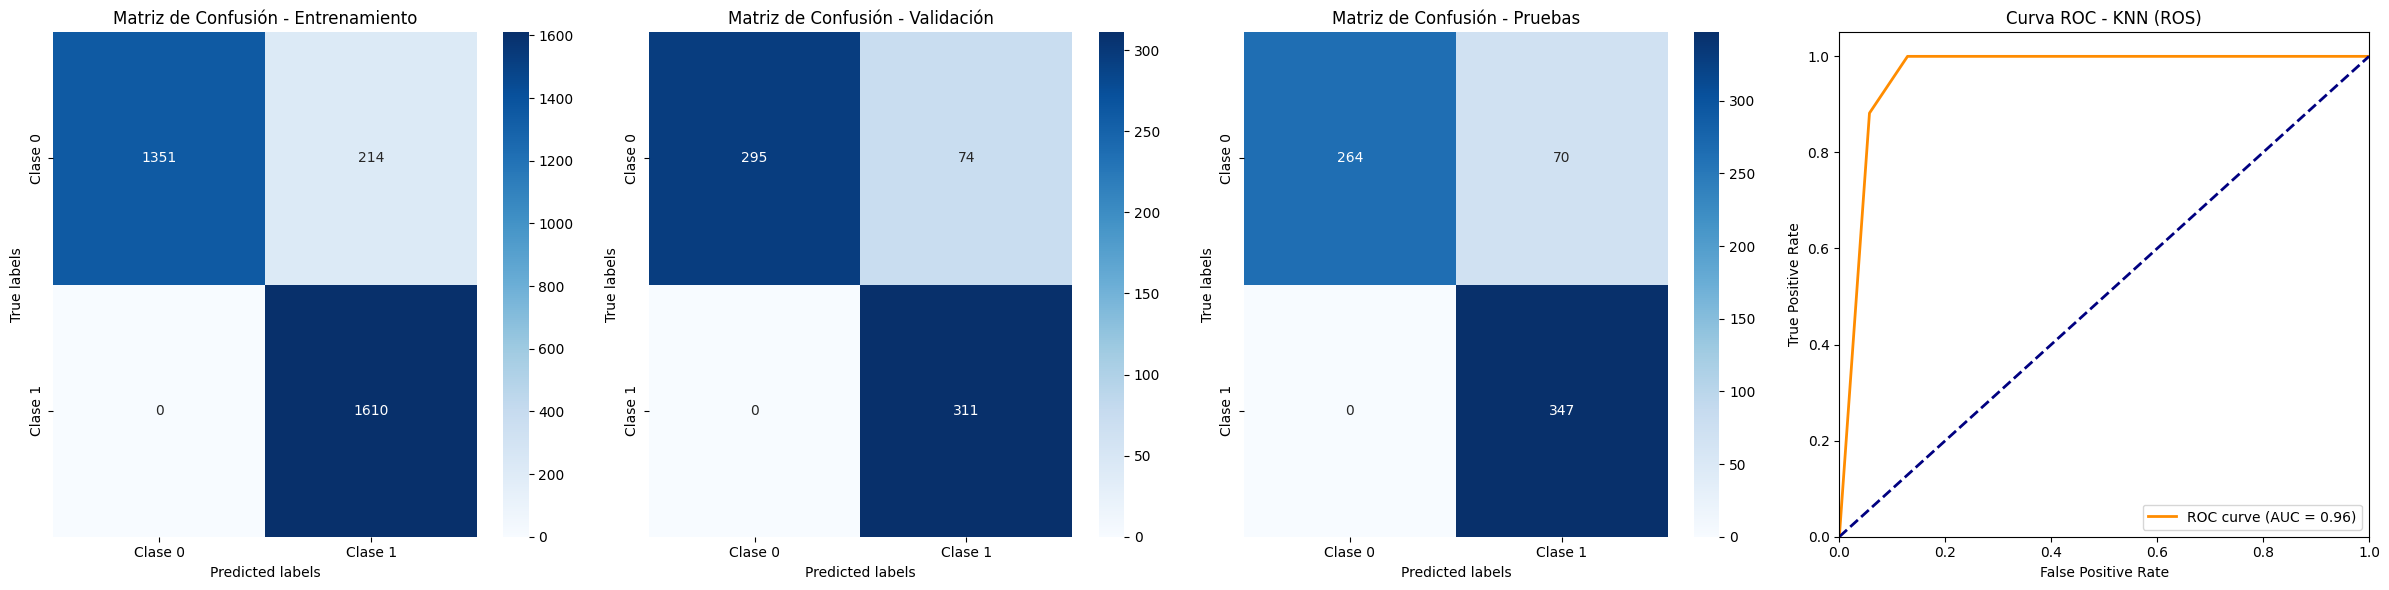

In [28]:
# Función para calcular las métricas y obtener la matriz de confusión
def metrics_model_knn_ros(x, y):
    predictions = ros_modelKNN.predict(x)
    accuracy_metric = accuracy_score(y, predictions)
    precision_metric = precision_score(y, predictions)
    recall_metric = recall_score(y, predictions)
    f1_metric = f1_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    specificity_metric = tn / (tn + fp)
    confusion_mat = confusion_matrix(y, predictions)
    return {
        'Accuracy': accuracy_metric, 
        'Precision': precision_metric, 
        'Recall': recall_metric, 
        'F1 score': f1_metric, 
        'Specificity': specificity_metric
    }, confusion_mat

# Calcular las métricas y matrices de confusión para entrenamiento, validación y pruebas
knn_ros_train_results, train_mat_conf_knn_ros = metrics_model_knn_ros(knn_ros_dataTrain, knn_ros_targetTrain)
knn_ros_val_results, val_mat_conf_knn_ros = metrics_model_knn_ros(knn_ros_dataVal, knn_ros_targetVal)
knn_ros_test_results, test_mat_conf_knn_ros = metrics_model_knn_ros(knn_ros_dataPrueba, knn_ros_targetPrueba)

# Imprimir los resultados
print(f'**METRICAS DE ENTRENAMIENTO KNN:\n{knn_ros_train_results}')
print(f'**METRICAS DE VALIDACION KNN:\n{knn_ros_val_results}')
print(f'**METRICAS DE PRUEBAS KNN:\n{knn_ros_test_results}')

# Etiquetas para las clases (ajusta esto según tu caso)
labels = ['Clase 0', 'Clase 1']

# Crear una figura para las matrices de confusión y el AUC
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Función para dibujar un mapa de calor de la matriz de confusión
def plot_confusion_matrix_knn_ros(ax, cm, labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)

# Graficar las matrices de confusión
plot_confusion_matrix_knn_ros(axs[0], train_mat_conf_knn_ros, labels, title='Matriz de Confusión - Entrenamiento')
plot_confusion_matrix_knn_ros(axs[1], val_mat_conf_knn_ros, labels, title='Matriz de Confusión - Validación')
plot_confusion_matrix_knn_ros(axs[2], test_mat_conf_knn_ros, labels, title='Matriz de Confusión - Pruebas')

# Cálculo y gráfica del AUC para el conjunto de pruebas
knn_ros_probs = ros_modelKNN.predict_proba(knn_ros_dataPrueba)[:, 1]
fpr, tpr, thresholds = roc_curve(knn_ros_targetPrueba, knn_ros_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
axs[3].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3].set_xlim([0.0, 1.0])
axs[3].set_ylim([0.0, 1.05])
axs[3].set_xlabel('False Positive Rate')
axs[3].set_ylabel('True Positive Rate')
axs[3].set_title('Curva ROC - KNN (ROS)')
axs[3].legend(loc="lower right")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()

#### XGBOOST

##### ROS

In [29]:
#1. REALIZAMOS LA DISTRIBUCION DE NUESTROS DATOS BALANCEADOS EN DATOS DE ENTRENAMIENTO, VALIDACION y PRUEBA
xg_ros_dataTrain,xg_ros_dataTemp,xg_ros_targetTrain,xg_ros_targetTemp=train_test_split(dataROS,targetROS,test_size=0.3,random_state=42)
xg_ros_dataVal, xg_ros_dataPrueba,xg_ros_targetVal, xg_ros_targetPrueba = train_test_split(xg_ros_dataTemp,xg_ros_targetTemp, test_size=0.50, random_state=42)
#2. ENTRENAMIENTO DEL MODELO XGBOOST
#A) INICIALIZACION DEL MODELO
start_train_time=time.time()
ros_modelXGB=XGBClassifier(n_estimators=500,max_depth=7,learning_rate=0.1,subsample=0.7,colsample_bytree=0.7,random_state=42)
ros_modelXGB.fit(xg_ros_dataTrain,xg_ros_targetTrain)
end_train_time=time.time()
time_training_model=(end_train_time-start_train_time)
print(f"TIEMPO DE ENTRENAMIENTO DEL MODELO: {time_training_model}")

TIEMPO DE ENTRENAMIENTO DEL MODELO: 0.5308446884155273


**METRICAS DE ENTRENAMIENTO XGBOOST (ROS):
{'Accuracy': 0.9669291338582677, 'Precision': 0.9387755102040817, 'Recall': 1.0, 'F1 score': 0.968421052631579, 'Specificity': np.float64(0.9329073482428115)}
**METRICAS DE VALIDACION XGBOOST (ROS):
{'Accuracy': 0.9235294117647059, 'Precision': 0.8567493112947658, 'Recall': 1.0, 'F1 score': 0.9228486646884273, 'Specificity': np.float64(0.8590785907859079)}
**METRICAS DE PRUEBAS XGBOOST (ROS):
{'Accuracy': 0.9383259911894273, 'Precision': 0.8920308483290489, 'Recall': 1.0, 'F1 score': 0.9429347826086957, 'Specificity': np.float64(0.874251497005988)}


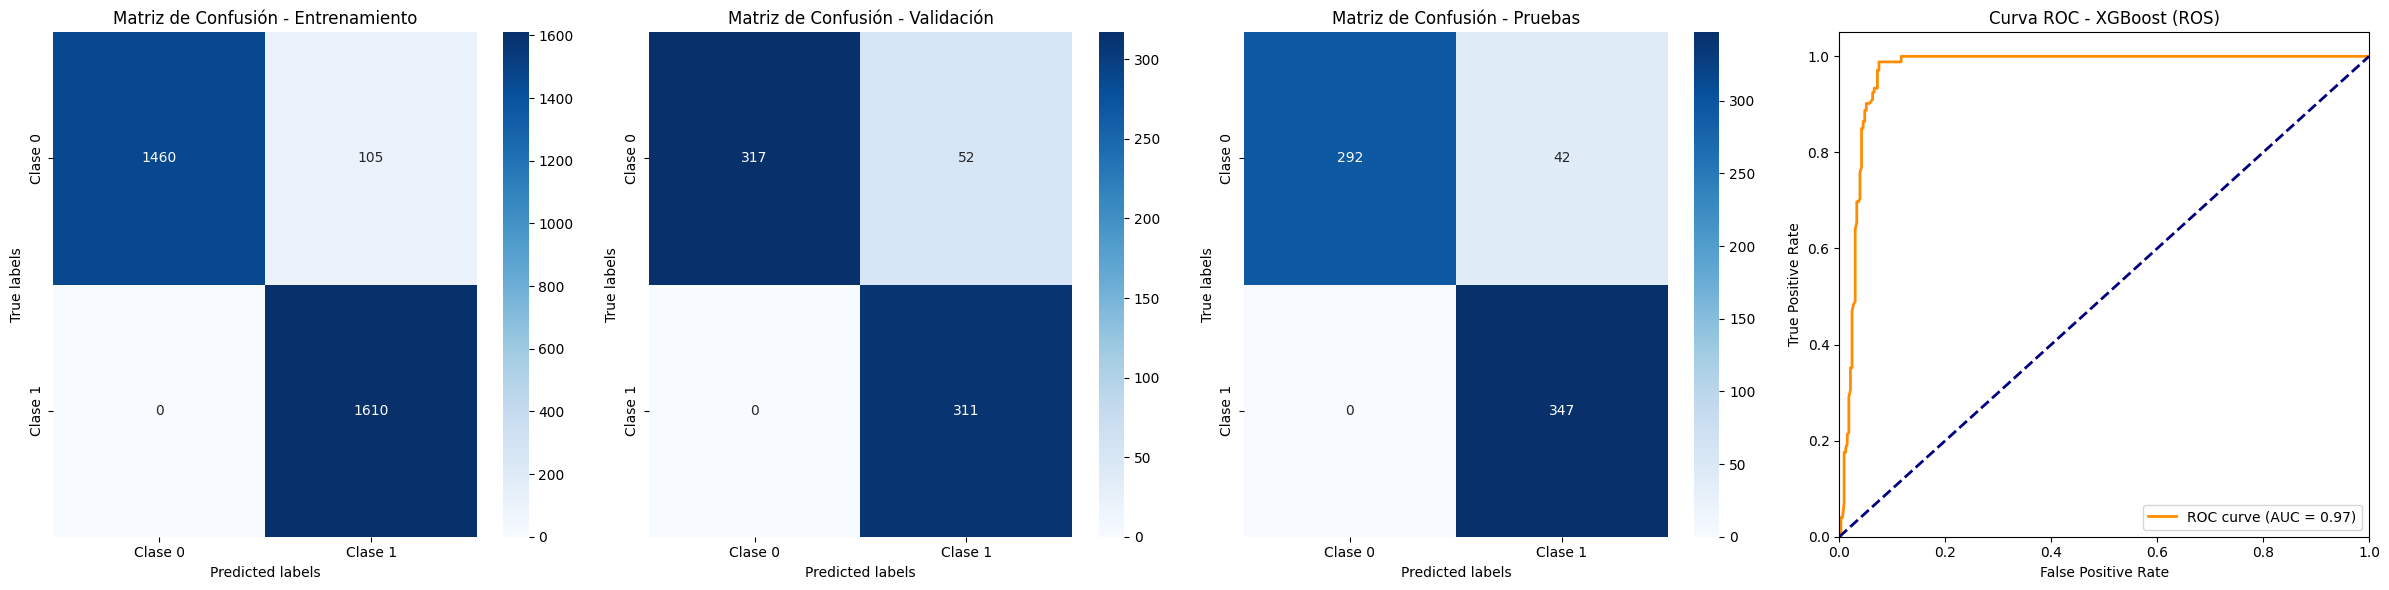

In [30]:
# Función para calcular las métricas y obtener la matriz de confusión
def metrics_model_xg_ros(x, y):
    predictions = ros_modelXGB.predict(x)
    accuracy_metric = accuracy_score(y, predictions)
    precision_metric = precision_score(y, predictions)
    recall_metric = recall_score(y, predictions)
    f1_metric = f1_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    specificity_metric = tn / (tn + fp)
    confusion_mat = confusion_matrix(y, predictions)
    return {
        'Accuracy': accuracy_metric, 
        'Precision': precision_metric, 
        'Recall': recall_metric, 
        'F1 score': f1_metric, 
        'Specificity': specificity_metric
    }, confusion_mat

# Calcular las métricas y matrices de confusión para entrenamiento, validación y pruebas
xg_ros_train_results, train_mat_conf_xg_ros = metrics_model_xg_ros(xg_ros_dataTrain, xg_ros_targetTrain)
xg_ros_val_results, val_mat_conf_xg_ros = metrics_model_xg_ros(xg_ros_dataVal, xg_ros_targetVal)
xg_ros_test_results, test_mat_conf_xg_ros = metrics_model_xg_ros(xg_ros_dataPrueba, xg_ros_targetPrueba)

# Imprimir los resultados
print(f'**METRICAS DE ENTRENAMIENTO XGBOOST (ROS):\n{xg_ros_train_results}')
print(f'**METRICAS DE VALIDACION XGBOOST (ROS):\n{xg_ros_val_results}')
print(f'**METRICAS DE PRUEBAS XGBOOST (ROS):\n{xg_ros_test_results}')

# Etiquetas para las clases (ajusta esto según tu caso)
labels = ['Clase 0', 'Clase 1']

# Crear una figura para las matrices de confusión y el AUC
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Función para dibujar un mapa de calor de la matriz de confusión
def plot_confusion_matrix_xg_ros(ax, cm, labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)

# Graficar las matrices de confusión
plot_confusion_matrix_xg_ros(axs[0], train_mat_conf_xg_ros, labels, title='Matriz de Confusión - Entrenamiento')
plot_confusion_matrix_xg_ros(axs[1], val_mat_conf_xg_ros, labels, title='Matriz de Confusión - Validación')
plot_confusion_matrix_xg_ros(axs[2], test_mat_conf_xg_ros, labels, title='Matriz de Confusión - Pruebas')

# Cálculo y gráfica del AUC para el conjunto de pruebas
xg_ros_probs = ros_modelXGB.predict_proba(xg_ros_dataPrueba)[:, 1]
fpr, tpr, thresholds = roc_curve(xg_ros_targetPrueba, xg_ros_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
axs[3].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3].set_xlim([0.0, 1.0])
axs[3].set_ylim([0.0, 1.05])
axs[3].set_xlabel('False Positive Rate')
axs[3].set_ylabel('True Positive Rate')
axs[3].set_title('Curva ROC - XGBoost (ROS)')
axs[3].legend(loc="lower right")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()

SMOTE

In [31]:
#1. REALIZAMOS LA DISTRIBUCION DE NUESTROS DATOS BALANCEADOS EN DATOS DE ENTRENAMIENTO, VALIDACION y PRUEBA
xg_smote_dataTrain,xg_smote_dataTemp,xg_smote_targetTrain,xg_smote_targetTemp=train_test_split(dataSMOTE,targetSMOTE,test_size=0.3,random_state=42)
xg_smote_dataVal, xg_smote_dataPrueba,xg_smote_targetVal, xg_smote_targetPrueba = train_test_split(xg_smote_dataTemp,xg_smote_targetTemp, test_size=0.50, random_state=42)
#2. ENTRENAMIENTO DEL MODELO XGBOOST
#A) INICIALIZACION DEL MODELO
start_train_time=time.time()
smote_modelXGB=XGBClassifier(n_estimators=500,max_depth=7,learning_rate=0.1,subsample=0.7,colsample_bytree=0.7,random_state=42)
smote_modelXGB.fit(xg_smote_dataTrain,xg_smote_targetTrain)
end_train_time=time.time()
time_training_model=(end_train_time-start_train_time)
print(f"TIEMPO DE ENTRENAMIENTO DEL MODELO: {time_training_model}")

TIEMPO DE ENTRENAMIENTO DEL MODELO: 0.4907190799713135


**METRICAS DE ENTRENAMIENTO XGBOOST (SMOTE):
{'Accuracy': 0.9099212598425197, 'Precision': 0.8866822429906542, 'Recall': 0.9428571428571428, 'F1 score': 0.9139072847682119, 'Specificity': np.float64(0.876038338658147)}
**METRICAS DE VALIDACION XGBOOST (SMOTE):
{'Accuracy': 0.8279411764705882, 'Precision': 0.7803468208092486, 'Recall': 0.8681672025723473, 'F1 score': 0.821917808219178, 'Specificity': np.float64(0.7940379403794038)}
**METRICAS DE PRUEBAS XGBOOST (SMOTE):
{'Accuracy': 0.8296622613803231, 'Precision': 0.7938931297709924, 'Recall': 0.899135446685879, 'F1 score': 0.8432432432432433, 'Specificity': np.float64(0.7574850299401198)}


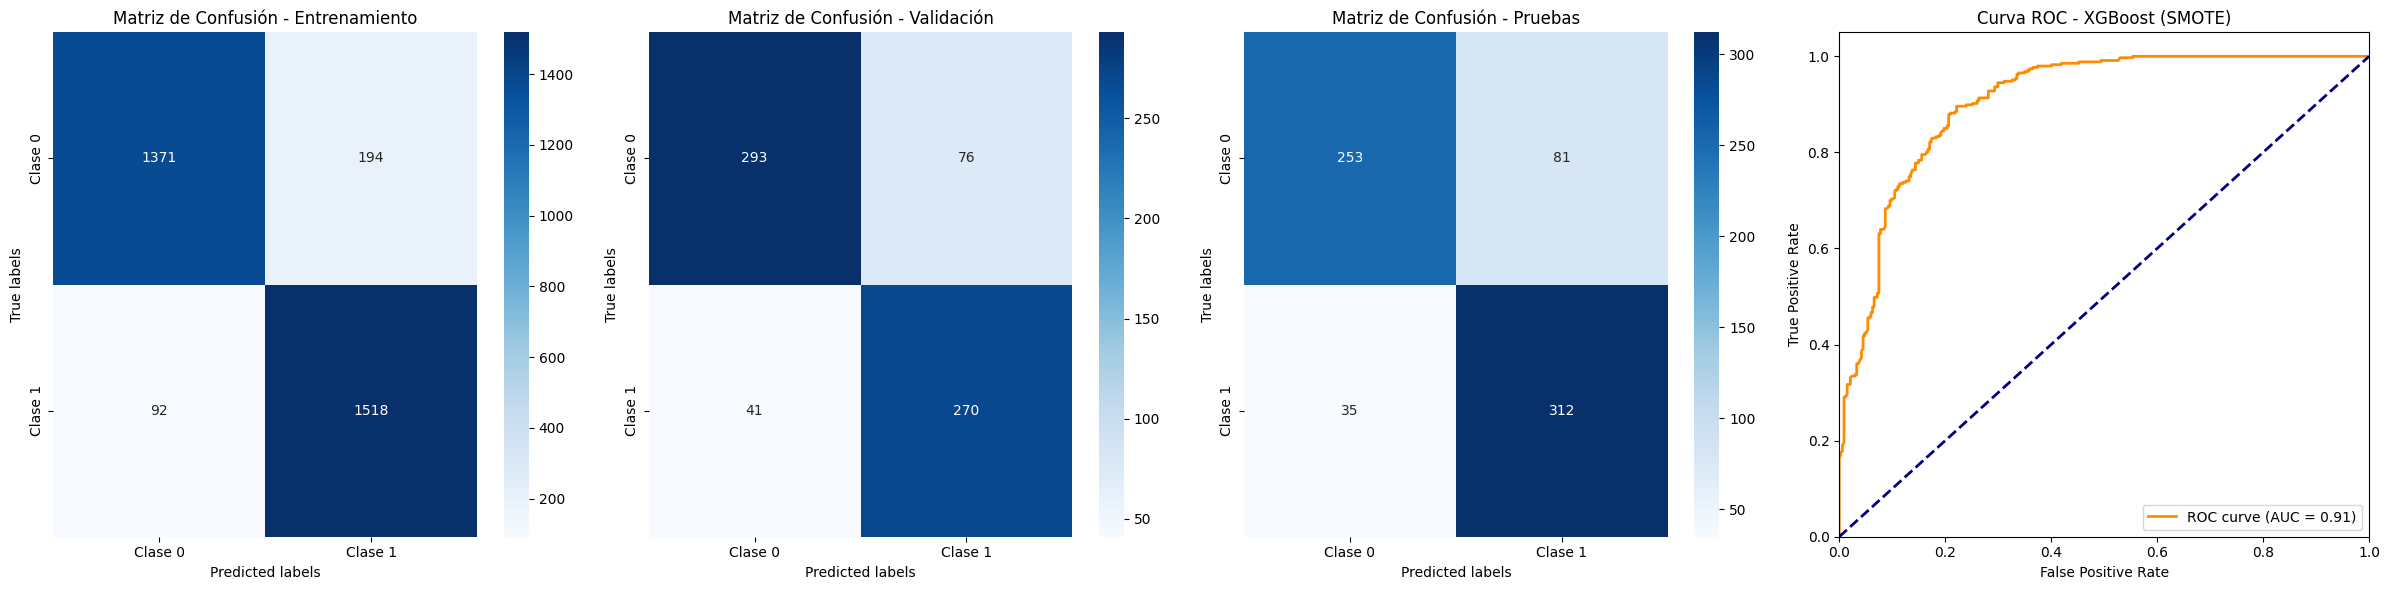

In [32]:
# Función para calcular las métricas y obtener la matriz de confusión
def metrics_model_xg_smote(x, y):
    predictions = smote_modelXGB.predict(x)
    accuracy_metric = accuracy_score(y, predictions)
    precision_metric = precision_score(y, predictions)
    recall_metric = recall_score(y, predictions)
    f1_metric = f1_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    specificity_metric = tn / (tn + fp)
    confusion_mat = confusion_matrix(y, predictions)
    return {
        'Accuracy': accuracy_metric, 
        'Precision': precision_metric, 
        'Recall': recall_metric, 
        'F1 score': f1_metric, 
        'Specificity': specificity_metric
    }, confusion_mat

# Calcular las métricas y matrices de confusión para entrenamiento, validación y pruebas
xg_smote_train_results, train_mat_conf_xg_smote = metrics_model_xg_smote(xg_smote_dataTrain, xg_smote_targetTrain)
xg_smote_val_results, val_mat_conf_xg_smote = metrics_model_xg_smote(xg_smote_dataVal, xg_smote_targetVal)
xg_smote_test_results, test_mat_conf_xg_smote = metrics_model_xg_smote(xg_smote_dataPrueba, xg_smote_targetPrueba)

# Imprimir los resultados
print(f'**METRICAS DE ENTRENAMIENTO XGBOOST (SMOTE):\n{xg_smote_train_results}')
print(f'**METRICAS DE VALIDACION XGBOOST (SMOTE):\n{xg_smote_val_results}')
print(f'**METRICAS DE PRUEBAS XGBOOST (SMOTE):\n{xg_smote_test_results}')

# Etiquetas para las clases (ajusta esto según tu caso)
labels = ['Clase 0', 'Clase 1']

# Crear una figura para las matrices de confusión y el AUC
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Función para dibujar un mapa de calor de la matriz de confusión
def plot_confusion_matrix_xg_smote(ax, cm, labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)

# Graficar las matrices de confusión
plot_confusion_matrix_xg_smote(axs[0], train_mat_conf_xg_smote, labels, title='Matriz de Confusión - Entrenamiento')
plot_confusion_matrix_xg_smote(axs[1], val_mat_conf_xg_smote, labels, title='Matriz de Confusión - Validación')
plot_confusion_matrix_xg_smote(axs[2], test_mat_conf_xg_smote, labels, title='Matriz de Confusión - Pruebas')

# Cálculo y gráfica del AUC para el conjunto de pruebas
xg_smote_probs = smote_modelXGB.predict_proba(xg_smote_dataPrueba)[:, 1]
fpr, tpr, thresholds = roc_curve(xg_smote_targetPrueba, xg_smote_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
axs[3].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3].set_xlim([0.0, 1.0])
axs[3].set_ylim([0.0, 1.05])
axs[3].set_xlabel('False Positive Rate')
axs[3].set_ylabel('True Positive Rate')
axs[3].set_title('Curva ROC - XGBoost (SMOTE)')
axs[3].legend(loc="lower right")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()

#### NAIVE BAYES

##### ROS

In [33]:
#1. REALIZAMOS LA DISTRIBUCION DE NUESTROS DATOS BALANCEADOS EN DATOS DE ENTRENAMIENTO, VALIDACION y PRUEBA
nb_ros_dataTrain,nb_ros_dataTemp,nb_ros_targetTrain,nb_ros_targetTemp=train_test_split(dataROS,targetROS,test_size=0.3,random_state=42)
nb_ros_dataVal, nb_ros_dataPrueba,nb_ros_targetVal, nb_ros_targetPrueba = train_test_split(nb_ros_dataTemp,nb_ros_targetTemp, test_size=0.50, random_state=42)
#2. ENTRENAMIENTO DEL MODELO NB
#A) INICIALIZACION DEL MODELO
start_train_time=time.time()
ros_modelNB=GaussianNB()
ros_modelNB.fit(nb_ros_dataTrain,nb_ros_targetTrain)
end_train_time=time.time()
time_training_model=(end_train_time-start_train_time)
print(f"TIEMPO DE ENTRENAMIENTO DEL MODELO: {time_training_model}")

TIEMPO DE ENTRENAMIENTO DEL MODELO: 0.002833843231201172


**METRICAS DE ENTRENAMIENTO NB (ROS):
{'Accuracy': 0.5489763779527559, 'Precision': 0.552046783625731, 'Recall': 0.5863354037267081, 'F1 score': 0.5686746987951807, 'Specificity': np.float64(0.5105431309904154)}
**METRICAS DE VALIDACION NB (ROS):
{'Accuracy': 0.5441176470588235, 'Precision': 0.5014492753623189, 'Recall': 0.5562700964630225, 'F1 score': 0.5274390243902439, 'Specificity': np.float64(0.5338753387533876)}
**METRICAS DE PRUEBAS NB (ROS):
{'Accuracy': 0.5814977973568282, 'Precision': 0.5846994535519126, 'Recall': 0.6167146974063401, 'F1 score': 0.6002805049088359, 'Specificity': np.float64(0.5449101796407185)}


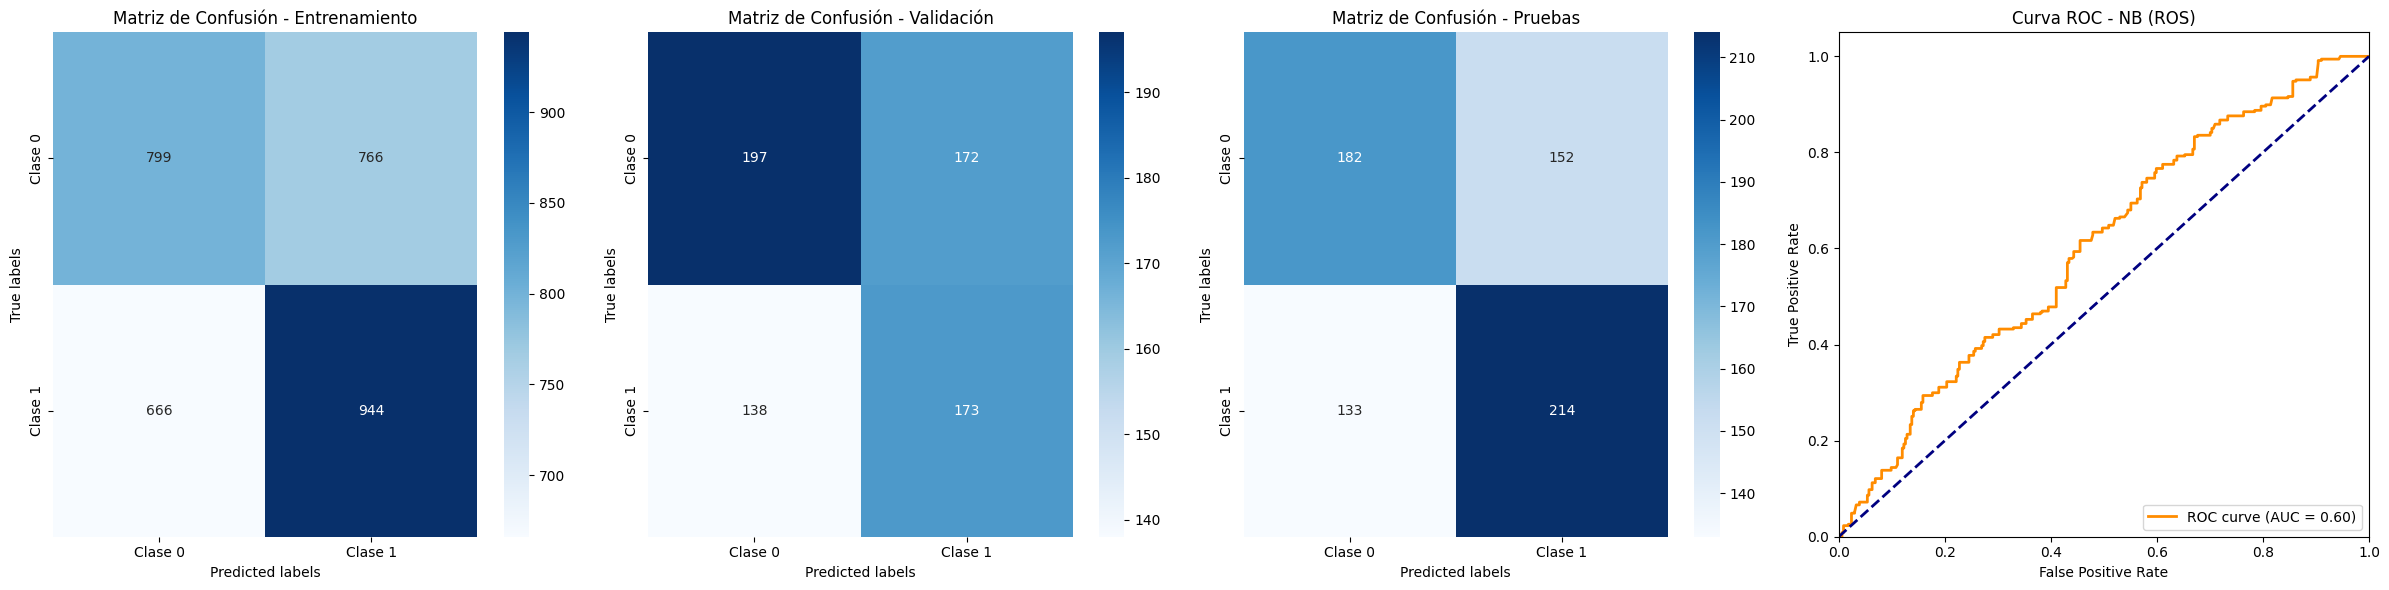

In [34]:
# Función para calcular las métricas y obtener la matriz de confusión
def metrics_model_nb_ros(x, y):
    predictions = ros_modelNB.predict(x)
    accuracy_metric = accuracy_score(y, predictions)
    precision_metric = precision_score(y, predictions)
    recall_metric = recall_score(y, predictions)
    f1_metric = f1_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    specificity_metric = tn / (tn + fp)
    confusion_mat = confusion_matrix(y, predictions)
    return {
        'Accuracy': accuracy_metric, 
        'Precision': precision_metric, 
        'Recall': recall_metric, 
        'F1 score': f1_metric, 
        'Specificity': specificity_metric
    }, confusion_mat

# Calcular las métricas y matrices de confusión para entrenamiento, validación y pruebas
nb_ros_train_results, train_mat_conf_nb_ros = metrics_model_nb_ros(nb_ros_dataTrain, nb_ros_targetTrain)
nb_ros_val_results, val_mat_conf_nb_ros = metrics_model_nb_ros(nb_ros_dataVal, nb_ros_targetVal)
nb_ros_test_results, test_mat_conf_nb_ros = metrics_model_nb_ros(nb_ros_dataPrueba, nb_ros_targetPrueba)

# Imprimir los resultados
print(f'**METRICAS DE ENTRENAMIENTO NB (ROS):\n{nb_ros_train_results}')
print(f'**METRICAS DE VALIDACION NB (ROS):\n{nb_ros_val_results}')
print(f'**METRICAS DE PRUEBAS NB (ROS):\n{nb_ros_test_results}')

# Etiquetas para las clases (ajusta esto según tu caso)
labels = ['Clase 0', 'Clase 1']

# Crear una figura para las matrices de confusión y el AUC
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Función para dibujar un mapa de calor de la matriz de confusión
def plot_confusion_matrix_nb_ros(ax, cm, labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)

# Graficar las matrices de confusión
plot_confusion_matrix_nb_ros(axs[0], train_mat_conf_nb_ros, labels, title='Matriz de Confusión - Entrenamiento')
plot_confusion_matrix_nb_ros(axs[1], val_mat_conf_nb_ros, labels, title='Matriz de Confusión - Validación')
plot_confusion_matrix_nb_ros(axs[2], test_mat_conf_nb_ros, labels, title='Matriz de Confusión - Pruebas')

# Cálculo y gráfica del AUC para el conjunto de pruebas
nb_ros_probs = ros_modelNB.predict_proba(nb_ros_dataPrueba)[:, 1]
fpr, tpr, thresholds = roc_curve(nb_ros_targetPrueba, nb_ros_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
axs[3].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3].set_xlim([0.0, 1.0])
axs[3].set_ylim([0.0, 1.05])
axs[3].set_xlabel('False Positive Rate')
axs[3].set_ylabel('True Positive Rate')
axs[3].set_title('Curva ROC - NB (ROS)')
axs[3].legend(loc="lower right")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()

##### SMOTE

In [35]:
#1. REALIZAMOS LA DISTRIBUCION DE NUESTROS DATOS BALANCEADOS EN DATOS DE ENTRENAMIENTO, VALIDACION y PRUEBA
nb_smote_dataTrain,nb_smote_dataTemp,nb_smote_targetTrain,nb_smote_targetTemp=train_test_split(dataSMOTE,targetSMOTE,test_size=0.3,random_state=42)
nb_smote_dataVal, nb_smote_dataPrueba,nb_smote_targetVal, nb_smote_targetPrueba = train_test_split(nb_smote_dataTemp,nb_smote_targetTemp, test_size=0.50, random_state=42)
#2. ENTRENAMIENTO DEL MODELO NB
#A) INICIALIZACION DEL MODELO
start_train_time=time.time()
smote_modelNB=GaussianNB()
smote_modelNB.fit(nb_smote_dataTrain,nb_smote_targetTrain)
end_train_time=time.time()
time_training_model=(end_train_time-start_train_time)
print(f"TIEMPO DE ENTRENAMIENTO DEL MODELO: {time_training_model}")

TIEMPO DE ENTRENAMIENTO DEL MODELO: 0.003862619400024414


**METRICAS DE ENTRENAMIENTO NB (SMOTE):
{'Accuracy': 0.6292913385826772, 'Precision': 0.6136482939632546, 'Recall': 0.7260869565217392, 'F1 score': 0.6651493598862019, 'Specificity': np.float64(0.5297124600638977)}
**METRICAS DE VALIDACION NB (SMOTE):
{'Accuracy': 0.6161764705882353, 'Precision': 0.5628140703517588, 'Recall': 0.7202572347266881, 'F1 score': 0.6318758815232722, 'Specificity': np.float64(0.5284552845528455)}
**METRICAS DE PRUEBAS NB (SMOTE):
{'Accuracy': 0.6475770925110133, 'Precision': 0.6289156626506024, 'Recall': 0.7521613832853026, 'F1 score': 0.6850393700787402, 'Specificity': np.float64(0.5389221556886228)}


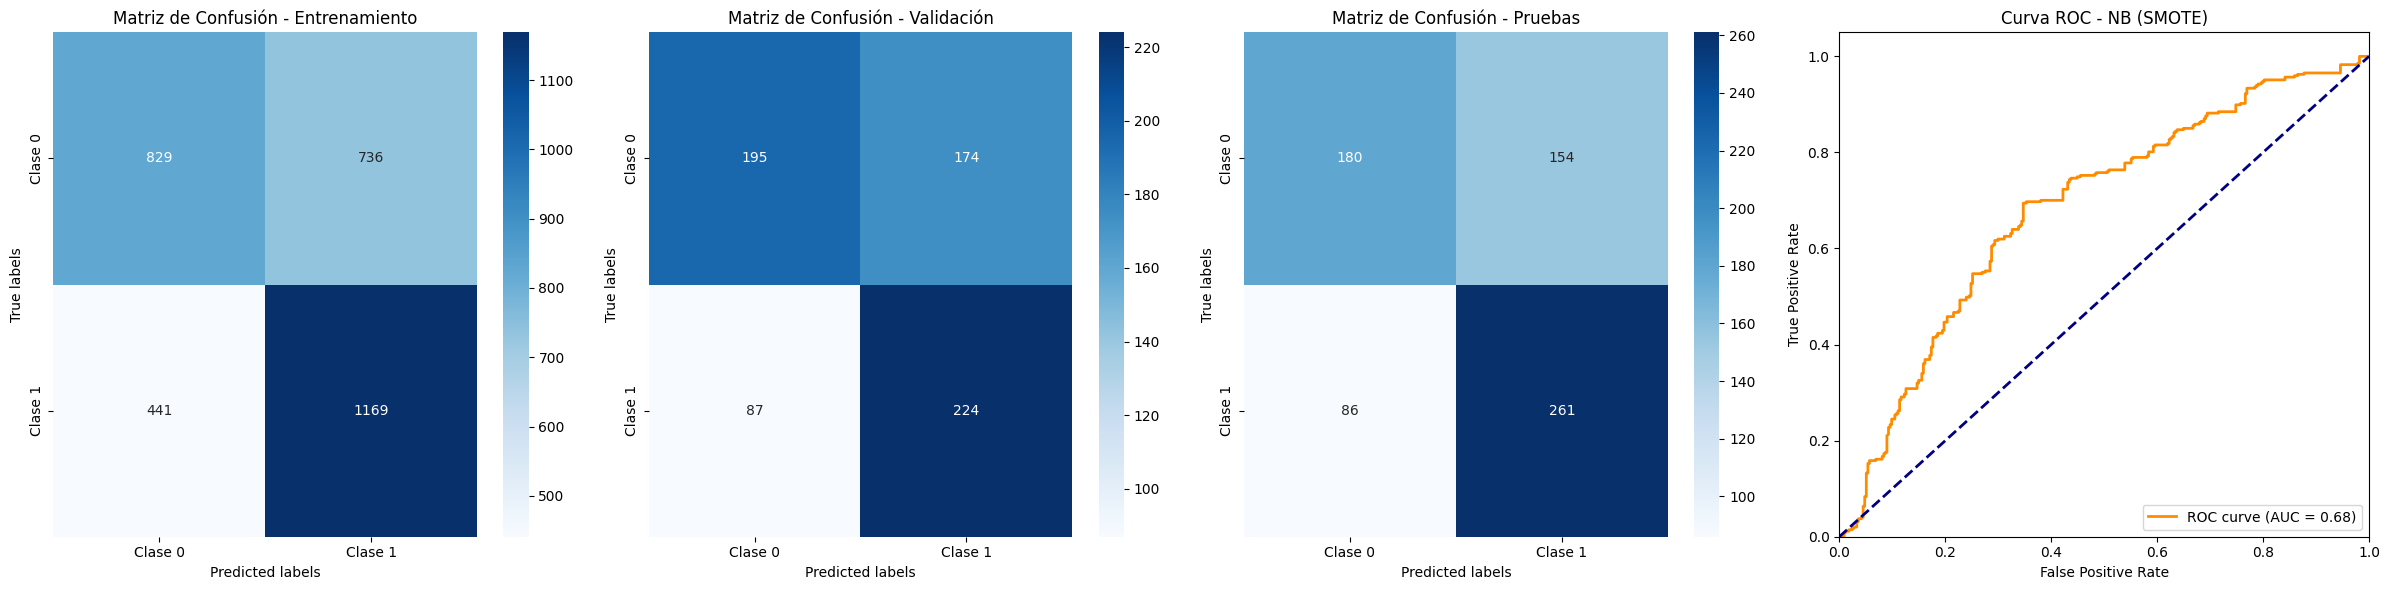

In [36]:
# Función para calcular las métricas y obtener la matriz de confusión
def metrics_model_nb_smote(x, y):
    predictions = smote_modelNB.predict(x)
    accuracy_metric = accuracy_score(y, predictions)
    precision_metric = precision_score(y, predictions)
    recall_metric = recall_score(y, predictions)
    f1_metric = f1_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    specificity_metric = tn / (tn + fp)
    confusion_mat = confusion_matrix(y, predictions)
    return {
        'Accuracy': accuracy_metric, 
        'Precision': precision_metric, 
        'Recall': recall_metric, 
        'F1 score': f1_metric, 
        'Specificity': specificity_metric
    }, confusion_mat

# Calcular las métricas y matrices de confusión para entrenamiento, validación y pruebas
nb_smote_train_results, train_mat_conf_nb_smote = metrics_model_nb_smote(nb_smote_dataTrain, nb_smote_targetTrain)
nb_smote_val_results, val_mat_conf_nb_smote = metrics_model_nb_smote(nb_smote_dataVal, nb_smote_targetVal)
nb_smote_test_results, test_mat_conf_nb_smote = metrics_model_nb_smote(nb_smote_dataPrueba, nb_smote_targetPrueba)

# Imprimir los resultados
print(f'**METRICAS DE ENTRENAMIENTO NB (SMOTE):\n{nb_smote_train_results}')
print(f'**METRICAS DE VALIDACION NB (SMOTE):\n{nb_smote_val_results}')
print(f'**METRICAS DE PRUEBAS NB (SMOTE):\n{nb_smote_test_results}')

# Etiquetas para las clases (ajusta esto según tu caso)
labels = ['Clase 0', 'Clase 1']

# Crear una figura para las matrices de confusión y el AUC
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Función para dibujar un mapa de calor de la matriz de confusión
def plot_confusion_matrix_nb_smote(ax, cm, labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)

# Graficar las matrices de confusión
plot_confusion_matrix_nb_smote(axs[0], train_mat_conf_nb_smote, labels, title='Matriz de Confusión - Entrenamiento')
plot_confusion_matrix_nb_smote(axs[1], val_mat_conf_nb_smote, labels, title='Matriz de Confusión - Validación')
plot_confusion_matrix_nb_smote(axs[2], test_mat_conf_nb_smote, labels, title='Matriz de Confusión - Pruebas')

# Cálculo y gráfica del AUC para el conjunto de pruebas
nb_smote_probs = smote_modelNB.predict_proba(nb_smote_dataPrueba)[:, 1]
fpr, tpr, thresholds = roc_curve(nb_smote_targetPrueba, nb_smote_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
axs[3].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3].set_xlim([0.0, 1.0])
axs[3].set_ylim([0.0, 1.05])
axs[3].set_xlabel('False Positive Rate')
axs[3].set_ylabel('True Positive Rate')
axs[3].set_title('Curva ROC - NB (SMOTE)')
axs[3].legend(loc="lower right")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()

#### ADABOOST

##### ROS

In [37]:
#1. REALIZAMOS LA DISTRIBUCION DE NUESTROS DATOS BALANCEADOS EN DATOS DE ENTRENAMIENTO, VALIDACION y PRUEBA
ab_ros_dataTrain,ab_ros_dataTemp,ab_ros_targetTrain,ab_ros_targetTemp=train_test_split(dataROS,targetROS,test_size=0.3,random_state=42)
ab_ros_dataVal, ab_ros_dataPrueba,ab_ros_targetVal, ab_ros_targetPrueba = train_test_split(ab_ros_dataTemp,ab_ros_targetTemp, test_size=0.50, random_state=42)
#2. ENTRENAMIENTO DEL MODELO ADABOOST
#A) INICIALIZACION DEL MODELO
start_train_time=time.time()
ros_modelAB=AdaBoostClassifier(algorithm='SAMME')
ros_modelAB.fit(ab_ros_dataTrain,ab_ros_targetTrain)
end_train_time=time.time()
time_training_model=(end_train_time-start_train_time)
print(f"TIEMPO DE ENTRENAMIENTO DEL MODELO: {time_training_model}")

TIEMPO DE ENTRENAMIENTO DEL MODELO: 0.1569211483001709


c:\MODELO-CRISIS-ASMATICA\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


**METRICAS DE ENTRENAMIENTO ADABOOST (ROS):
{'Accuracy': 0.575748031496063, 'Precision': 0.5595831445400997, 'Recall': 0.7670807453416149, 'F1 score': 0.6471050563269584, 'Specificity': np.float64(0.37891373801916933)}
**METRICAS DE VALIDACION ADABOOST (ROS):
{'Accuracy': 0.5735294117647058, 'Precision': 0.524822695035461, 'Recall': 0.7138263665594855, 'F1 score': 0.6049046321525886, 'Specificity': np.float64(0.45528455284552843)}
**METRICAS DE PRUEBAS ADABOOST (ROS):
{'Accuracy': 0.6093979441997063, 'Precision': 0.5874730021598272, 'Recall': 0.7838616714697406, 'F1 score': 0.671604938271605, 'Specificity': np.float64(0.4281437125748503)}


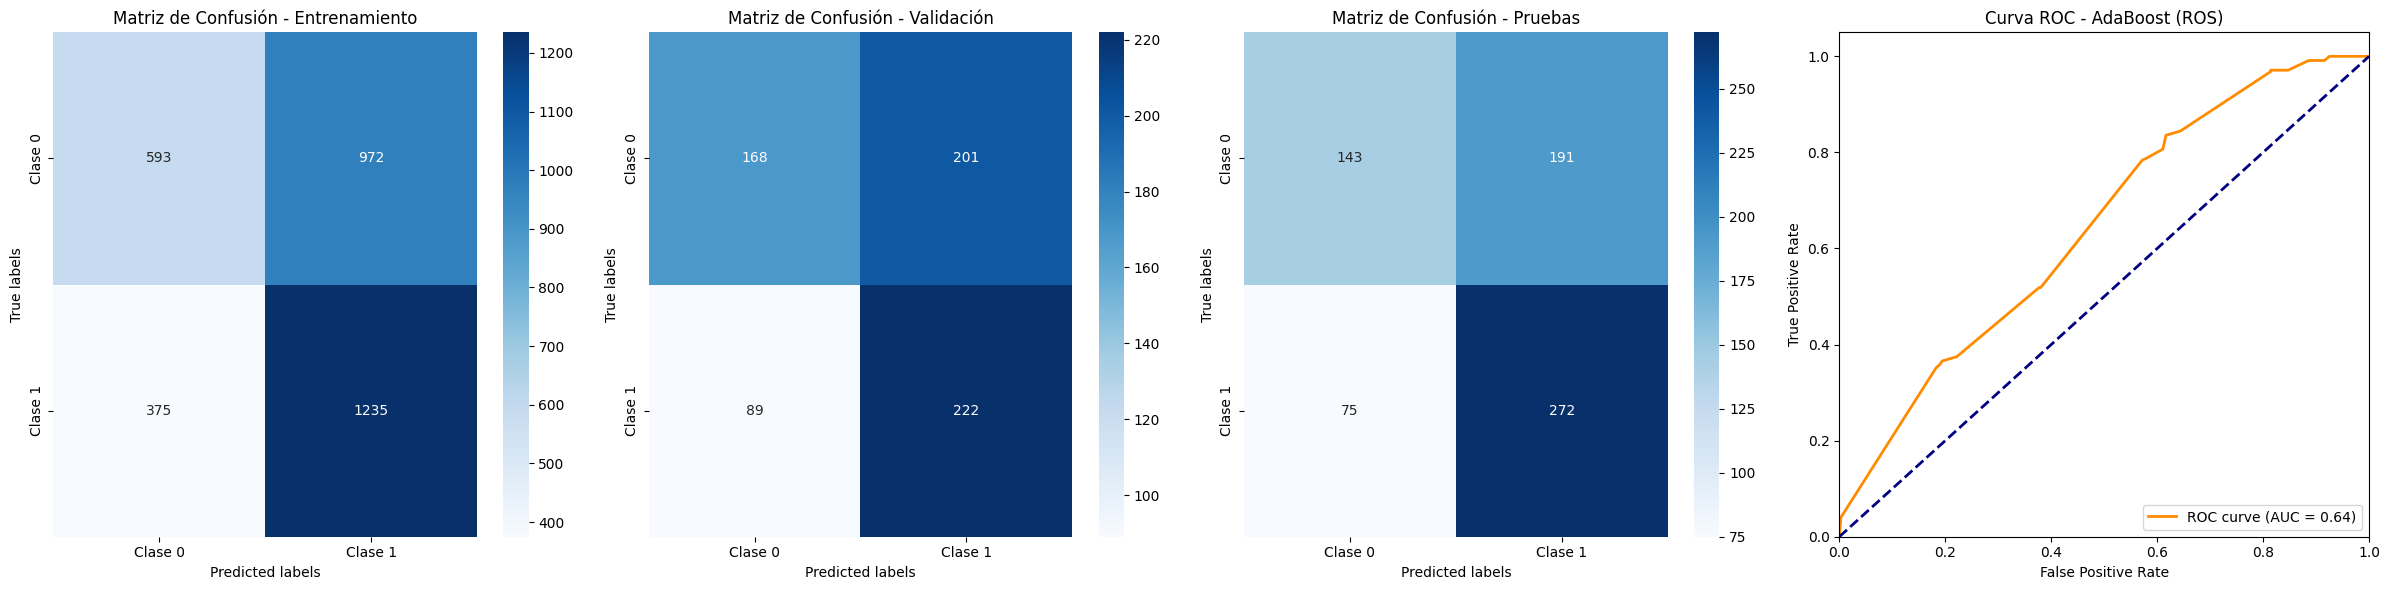

In [38]:
# Función para calcular las métricas y obtener la matriz de confusión
def metrics_model_ab_ros(x, y):
    predictions = ros_modelAB.predict(x)
    accuracy_metric = accuracy_score(y, predictions)
    precision_metric = precision_score(y, predictions)
    recall_metric = recall_score(y, predictions)
    f1_metric = f1_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    specificity_metric = tn / (tn + fp)
    confusion_mat = confusion_matrix(y, predictions)
    return {
        'Accuracy': accuracy_metric, 
        'Precision': precision_metric, 
        'Recall': recall_metric, 
        'F1 score': f1_metric, 
        'Specificity': specificity_metric
    }, confusion_mat

# Calcular las métricas y matrices de confusión para entrenamiento, validación y pruebas
ab_ros_train_results, train_mat_conf_ab_ros = metrics_model_ab_ros(ab_ros_dataTrain, ab_ros_targetTrain)
ab_ros_val_results, val_mat_conf_ab_ros = metrics_model_ab_ros(ab_ros_dataVal, ab_ros_targetVal)
ab_ros_test_results, test_mat_conf_ab_ros = metrics_model_ab_ros(ab_ros_dataPrueba, ab_ros_targetPrueba)

# Imprimir los resultados
print(f'**METRICAS DE ENTRENAMIENTO ADABOOST (ROS):\n{ab_ros_train_results}')
print(f'**METRICAS DE VALIDACION ADABOOST (ROS):\n{ab_ros_val_results}')
print(f'**METRICAS DE PRUEBAS ADABOOST (ROS):\n{ab_ros_test_results}')

# Etiquetas para las clases (ajusta esto según tu caso)
labels = ['Clase 0', 'Clase 1']

# Crear una figura para las matrices de confusión y el AUC
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Función para dibujar un mapa de calor de la matriz de confusión
def plot_confusion_matrix_ab_ros(ax, cm, labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)

# Graficar las matrices de confusión
plot_confusion_matrix_ab_ros(axs[0], train_mat_conf_ab_ros, labels, title='Matriz de Confusión - Entrenamiento')
plot_confusion_matrix_ab_ros(axs[1], val_mat_conf_ab_ros, labels, title='Matriz de Confusión - Validación')
plot_confusion_matrix_ab_ros(axs[2], test_mat_conf_ab_ros, labels, title='Matriz de Confusión - Pruebas')

# Cálculo y gráfica del AUC para el conjunto de pruebas
ab_ros_probs = ros_modelAB.predict_proba(ab_ros_dataPrueba)[:, 1]
fpr, tpr, thresholds = roc_curve(ab_ros_targetPrueba, ab_ros_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
axs[3].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3].set_xlim([0.0, 1.0])
axs[3].set_ylim([0.0, 1.05])
axs[3].set_xlabel('False Positive Rate')
axs[3].set_ylabel('True Positive Rate')
axs[3].set_title('Curva ROC - AdaBoost (ROS)')
axs[3].legend(loc="lower right")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()

##### SMOTE

In [39]:
#1. REALIZAMOS LA DISTRIBUCION DE NUESTROS DATOS BALANCEADOS EN DATOS DE ENTRENAMIENTO, VALIDACION y PRUEBA
ab_smote_dataTrain,ab_smote_dataTemp,ab_smote_targetTrain,ab_smote_targetTemp=train_test_split(dataSMOTE,targetSMOTE,test_size=0.3,random_state=42)
ab_smote_dataVal, ab_smote_dataPrueba,ab_smote_targetVal, ab_smote_targetPrueba = train_test_split(ab_smote_dataTemp,ab_smote_targetTemp, test_size=0.50, random_state=42)
#2. ENTRENAMIENTO DEL MODELO ADABOOST
#A) INICIALIZACION DEL MODELO
start_train_time=time.time()
smote_modelAB=AdaBoostClassifier(algorithm='SAMME')
smote_modelAB.fit(ab_smote_dataTrain,ab_smote_targetTrain)
end_train_time=time.time()
time_training_model=(end_train_time-start_train_time)
print(f"TIEMPO DE ENTRENAMIENTO DEL MODELO: {time_training_model}")

TIEMPO DE ENTRENAMIENTO DEL MODELO: 0.14879965782165527


c:\MODELO-CRISIS-ASMATICA\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


**METRICAS DE ENTRENAMIENTO ADABOOST (SMOTE):
{'Accuracy': 0.6525984251968504, 'Precision': 0.6441159749857874, 'Recall': 0.7037267080745342, 'F1 score': 0.6726031463342238, 'Specificity': np.float64(0.6)}
**METRICAS DE VALIDACION ADABOOST (SMOTE):
{'Accuracy': 0.6573529411764706, 'Precision': 0.6083333333333333, 'Recall': 0.7041800643086816, 'F1 score': 0.6527570789865872, 'Specificity': np.float64(0.6178861788617886)}
**METRICAS DE PRUEBAS ADABOOST (SMOTE):
{'Accuracy': 0.6696035242290749, 'Precision': 0.6605263157894737, 'Recall': 0.723342939481268, 'F1 score': 0.6905089408528198, 'Specificity': np.float64(0.6137724550898204)}


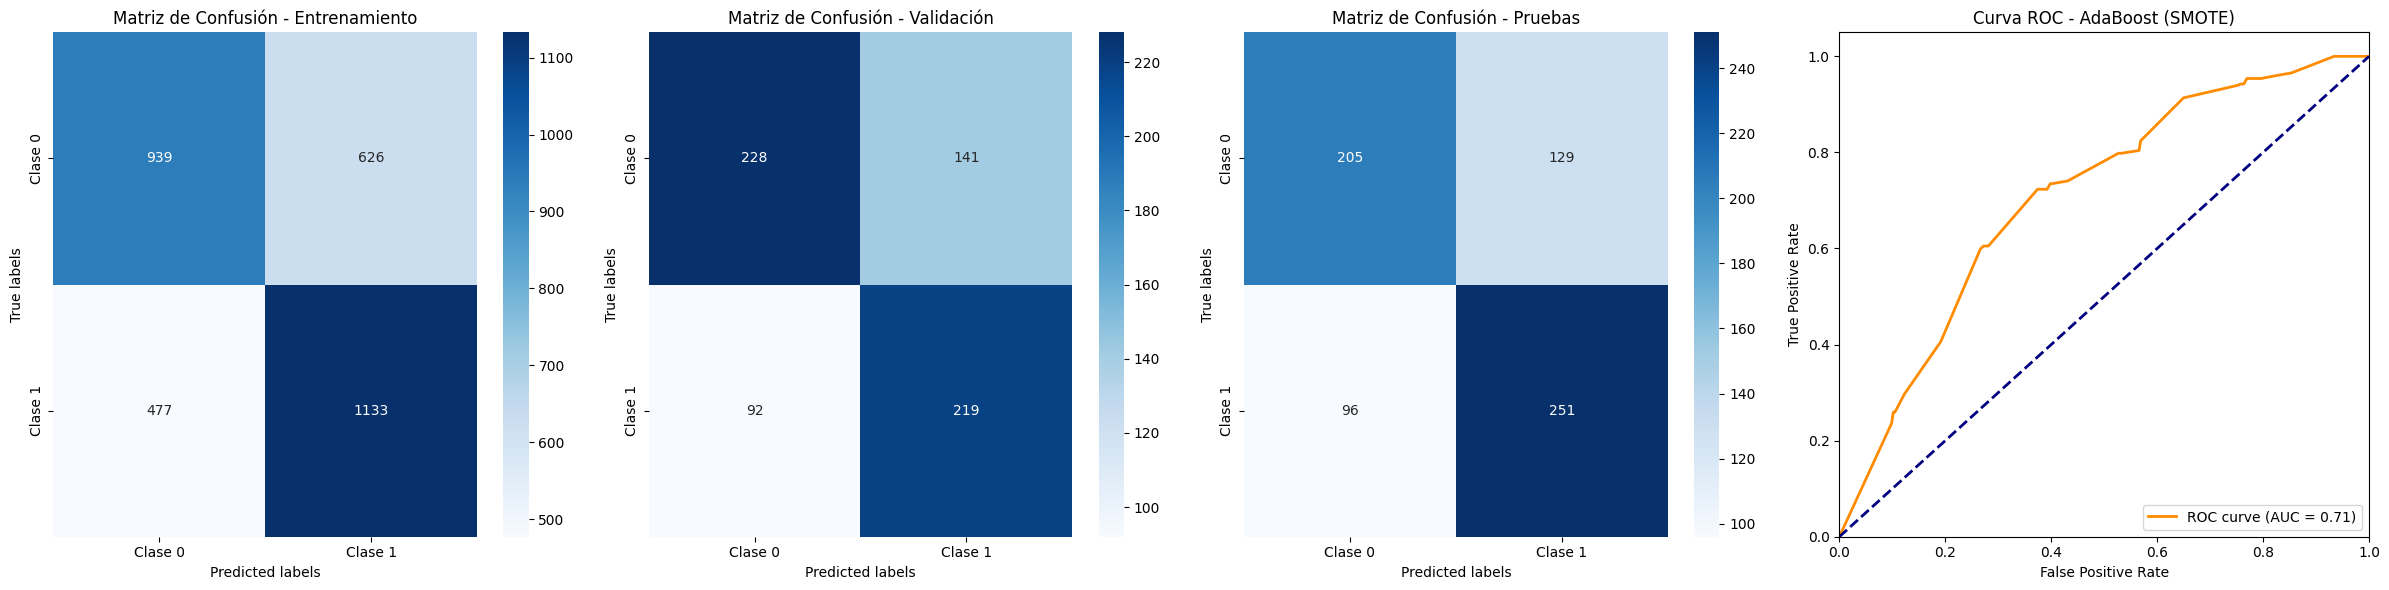

In [40]:
# Función para calcular las métricas y obtener la matriz de confusión
def metrics_model_ab_smote(x, y):
    predictions = smote_modelAB.predict(x)
    accuracy_metric = accuracy_score(y, predictions)
    precision_metric = precision_score(y, predictions)
    recall_metric = recall_score(y, predictions)
    f1_metric = f1_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    specificity_metric = tn / (tn + fp)
    confusion_mat = confusion_matrix(y, predictions)
    return {
        'Accuracy': accuracy_metric, 
        'Precision': precision_metric, 
        'Recall': recall_metric, 
        'F1 score': f1_metric, 
        'Specificity': specificity_metric
    }, confusion_mat

# Calcular las métricas y matrices de confusión para entrenamiento, validación y pruebas
ab_smote_train_results, train_mat_conf_ab_smote = metrics_model_ab_smote(ab_smote_dataTrain, ab_smote_targetTrain)
ab_smote_val_results, val_mat_conf_ab_smote = metrics_model_ab_smote(ab_smote_dataVal, ab_smote_targetVal)
ab_smote_test_results, test_mat_conf_ab_smote = metrics_model_ab_smote(ab_smote_dataPrueba, ab_smote_targetPrueba)

# Imprimir los resultados
print(f'**METRICAS DE ENTRENAMIENTO ADABOOST (SMOTE):\n{ab_smote_train_results}')
print(f'**METRICAS DE VALIDACION ADABOOST (SMOTE):\n{ab_smote_val_results}')
print(f'**METRICAS DE PRUEBAS ADABOOST (SMOTE):\n{ab_smote_test_results}')

# Etiquetas para las clases (ajusta esto según tu caso)
labels = ['Clase 0', 'Clase 1']

# Crear una figura para las matrices de confusión y el AUC
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Función para dibujar un mapa de calor de la matriz de confusión
def plot_confusion_matrix_ab_smote(ax, cm, labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)

# Graficar las matrices de confusión
plot_confusion_matrix_ab_smote(axs[0], train_mat_conf_ab_smote, labels, title='Matriz de Confusión - Entrenamiento')
plot_confusion_matrix_ab_smote(axs[1], val_mat_conf_ab_smote, labels, title='Matriz de Confusión - Validación')
plot_confusion_matrix_ab_smote(axs[2], test_mat_conf_ab_smote, labels, title='Matriz de Confusión - Pruebas')

# Cálculo y gráfica del AUC para el conjunto de pruebas
ab_smote_probs = smote_modelAB.predict_proba(ab_smote_dataPrueba)[:, 1]
fpr, tpr, thresholds = roc_curve(ab_smote_targetPrueba, ab_smote_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
axs[3].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3].set_xlim([0.0, 1.0])
axs[3].set_ylim([0.0, 1.05])
axs[3].set_xlabel('False Positive Rate')
axs[3].set_ylabel('True Positive Rate')
axs[3].set_title('Curva ROC - AdaBoost (SMOTE)')
axs[3].legend(loc="lower right")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()

#### EXPORTAR MODELO RANDOM FORES (ROS)

##### GUARDADO DATA SET BALANCEADO (CSV)

In [42]:
#ALMACENAMOS EN CSV, LOS DATOS BALANCEADOS
columns_risk_factors=dataROS.copy()
target_risk_factors=targetROS.copy()

# Si target_risk_factors es una Series, conviértelo en DataFrame con un nombre de columna
if isinstance(target_risk_factors, pd.Series):
    target_risk_factors = target_risk_factors.to_frame(name='Asma')

# Combina las características y la variable objetivo en un solo DataFrame
dataset_asma_balanceado = pd.concat([columns_risk_factors, target_risk_factors], axis=1)

# Almacena el DataFrame combinado en un archivo CSV
dataset_asma_balanceado.to_csv("dataset_asma_balanceado.csv",index=False)

print("El dataset balanceado se ha guardado en 'dataset_asma_balanceado.csv'")

El dataset balanceado se ha guardado en 'dataset_asma_balanceado.csv'


##### EXPORTACION MODELO

In [43]:
import pickle

# Guarda el modelo random forest con ros
pickle.dump(ros_modelRF, open('asma_model.pkl', 'wb'))
print('Modelo exportado')

Modelo exportado
